# MSDS 7331 - Lab Two: Regress or Classify

### Investigators
- [Matt Baldree](mailto:mbaldree@smu.edu?subject=lab2)
- [Tom Elkins](telkins@smu.edu?subject=lab2)
- [Austin Kelly](ajkelly@smu.edu?subject=lab2)
- [Ben Brock](bbrock@smu.edu?subject=lab2)


<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Lab Instructions</h3>
    <p>You are to build upon the predictive analysis that you already completed in the previous mini-project, adding additional modeling from new classification algorithms as well as more explanations that are inline with the CRISP-DM framework. You should use appropriate cross validation for all of your analysis (explain your chosen method of performance validation <i>in detail</i>). Try to use as much testing data as possible <i>in a realistic manner</i> (you should define what you think is realistic and why).</p>
    <p>This report is worth 20% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a single document. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.</p>
    <p>Report Sections:</p>
    <ol>
        <li>[Data Preparation](#data_preparation) <b>(15 points)</b></li>
        <li>[Modeling and Evaluation](#modeling_and_evaluation) <b>(70 points)</b></li>
        <li>[Deployment](#deployment) <b>(5 points)</b></li>
        <li>[Exceptional Work](#exceptional_work) <b>(10 points)</b></li>
    </ol>
</div>

<a id='data_preparation'></a>
## 1 - Data Preparation
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Data Preparation (<b>15 points total</b>)</h3>
    <ul><li>[<b>10 points total</b>] [1.1 - Define and prepare your class variables](#define_and_prepare_class_variables). Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reductions, scaling, etc. Remove variables that are not needed/useful for the analysis.</li>
    <li>[<b>5 points total</b>] [1.2 - Describe the final dataset](#describe_final_dataset) that is used for classification/regression (include a description of any newly formed variables you created.)</li>
    </ul>
</div>

<a id='define_and_prepare_class_variables'></a>
### 1.1 - Define and Prepare Class Variables
The data set chosen for lab 2 is the 2015 Washington DC Metro Crime inspired from a Kaggle data set found at [Kaggle](https://www.kaggle.com/vinchinzu/dc-metro-crime-data). The data set was obtained by following the steps found on the [Using the Crime Map Application](http://mpdc.dc.gov/node/200622) page. This site allowed us to download data by political ward for all eight wards from 01/01/2015 to 12/31/2015 as CSV files. These individual ward files were then merged together into a single file for our use. This data set contains 36,493 entries and 18 attributes that are both continuous and discrete. This satisfies the data set requirement for a minimum of 30,000 entries and 10 attributes which are both continuous and discrete. Further definition of this data set will be discussed in the [Data Understanding](#data_understanding) section.

The data is supplimented by weather and demographic data. For weather, data that corresponds to the end date of the crime obtained from [Wunderground](http://wunderground.com) to see if weather is a predictor or crimes in DC. For demographic, the number of people on food stamps in an adivsory neighborhood commission (ANC) for the year of the end date of the crime was obtained from [Neighborhood Info DC](http://www.neighborhoodinfodc.org/anc12/anc.html).

![Ward Map](images/ANC_2012.jpg "Washington DC ANC") 
<p style='text-align: center;'>
Washington DC Advisory Neighborhood Map
</p>

The crime data is published by the Washington DC Metro police department daily (see below image) to provide their residents a clear picture of crime trends as they actually happen. The data is shared with its residents such as Advisory Neighborhood Commissions, see above, to help the police determine how to keep neighborhoods safe. The data is also analyzed to determine the effectiveness of current investments such as putting more officers on the streets, buying police more tools, and launching community partnerships, see [Washington DC Metro Police Department report](http://mpdc.dc.gov/publication/mpd-annual-report-2015) for more details.

![Ward Map](images/dc_2015_crime.tiff "Washington DC Year End Crime Data") 
<p style='text-align: center;'>
Washington DC Metro 2015 Year End Crime Data
</p>

### Supplimental Data (Attributes Recommended by the Washington, D.C. Police Department)

One of our team members went to Panera Bread in the Washington, DC area for lunch on a Friday afternoon and noticed five policemen enjoying lunch at the same time. Since our team has been working so fervently on the causes of crime in the DC area, the team member decided it would be a good idea to hear the officer's thoughts on the matter. This was a fantastic opportunity for us to receive an opinion from subject-matter experts. After discussion of the project and what we have managed to accomplish thus far, we asked the policemen what they thought would be the most influential factors (as well as possible causes) of crime in the area. Once interviewed, the policemen responded that the likely variables which should be investigated are:

* **Drug Use**
* **Unemployment**
* **Education**
* **Housing prices** 

We then investigated and found the data two of the four variables (Unemployment and Housing) in the ANC datat set that map to [ANC data](http://www.neighborhoodinfodc.org). As [DJ Patil](https://www.whitehouse.gov/blog/author/dj-patil), the Whitehouse Deputy Chief Technology Officer for Data Policy and Chief Data Scientist suggests, we used open data and data science to hopefully solve present and future problems.   

### 1.1.1 - Load Data

In [31]:
# generic imports
import pandas as pd
import numpy as np
from __future__ import print_function

# plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# scikit imports
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier

# Read in the crime data from the CSV file
df = pd.read_csv('data/DC_Crime_2015_Lab2_Weather.csv')
#df_foodstamps = pd.read_csv('data/foodstamps.csv')
df_anc_data = pd.read_csv('data/ANC Data Unemployment and Housing Master.csv')

In [32]:
# how is the data represented?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 33 columns):
REPORT_DAT              36489 non-null object
SHIFT                   36489 non-null object
OFFENSE                 36489 non-null object
METHOD                  36489 non-null object
DISTRICT                36442 non-null float64
PSA                     36441 non-null float64
WARD                    36489 non-null int64
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
CENSUS_TRACT            36489 non-null int64
VOTING_PRECINCT         36489 non-null int64
CCN                     36489 non-null int64
XBLOCK                  36489 non-null float64
YBLOCK                  36489 non-null float64
START_DATE              36489 non-null object
END_DATE                36489 non-null object
PSA_ID                  36489 non-null int64
DistrictID              36489 non-null int64
SHIFT_Code              36489 non-null int64
OFFENSE_Code          

In [33]:
df_anc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
YR                85 non-null int64
ANC               85 non-null int64
ANC2              85 non-null object
ANC3              85 non-null object
Housing_Prices    85 non-null int64
Unemployment      85 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.1+ KB


In [34]:
# drop ANC2 and ANC3 from the df_anc_data DataFrame
del df_anc_data['ANC2']
del df_anc_data['ANC3']

### 1.1.2 - Attribute Details
Remove unnecessary attributes and add attributes that might help us predict an offense.

#### Attributes to Remove
The below table provides a description of attributes that will be removed because they provide little to no predictive power.

|Attribute|Description|Removal Reason|
|:------|:----------|:-------------|
|REPORT_DAT| The date/time the offense was *reported*| When the crime was report is not a predictor of a crime.|
|SHIFT| The duty shift that responded to the call.| This is an eight hour window that is too coarse grain.|
|OFFENSE| The category of crime committed.| This attribute is redundant with OFFENSE_Code. It will be stored off for its labels.|
|METHOD| The category of the method used to commit the crime.| This attribute is redundant with METHOD_Code. It will be stored off for its labels.|
|DISTRICT| The police district.| This attribute was replaced earlier preprocessing to create DistrictID.|
|PSA| Police Service Area| This attribute was replaced earlier preprocessing to create PSA_ID.|
|WARD| The political Ward identifier.| WARD can be derived from NEIGHBORHOOD_CLUSTER which provides a smaller geographic resolution.|
|CENSUS_TRACT| Land management tract identifier.| This attribute is superceded by other geographical data.|
|VOTING_PRECINCT| Political subdivision| This attribute is superceded by other geographical data.|
|CCN| Criminal Complaint Number - unique to each report| An index for the crime report.|
|XBLOCK| Eastern coordinate of crime scene (meters)| This attribute is superceded by lattitude and longitude.|
|YBLOCK| Northern coordinate of crime scene (meters)| This attribute is superceded by lattitude and longitude.|
|START_DATE| The earliest the crime *might* have been committed.| END_DATE provides a more accurate time when considering unwitness crimes.|
|DistrictID| The police district.| Redundant with PSA_ID. DistrictID can be derived from PSA_ID.|
|SHIFT_Code| The duty shift that responded to the call.| This is an eight hour window that is too coarse grain.|
|METHOD_Code| The coded method used to commit the crime.| Over 90% of the crimes are coded OTHER so this attribute is useless.|
|CRIME_TYPE| The code for the type of crime. This attribute can be determined from OFFENSE_Code.|
|AGE| The difference in end data and start date of the crime.| This attribute is unreliable due to the discrepency in start dates.|
|TIME_TO_REPORT| The time it took for the police to report the crime.| This attribue represents action after the crime.|

In [35]:
# save target descriptions
clf_offense_descriptions = df.OFFENSE.unique()

print(clf_offense_descriptions)

['THEFT/OTHER' 'THEFT F/AUTO' 'BURGLARY' 'ASSAULT W/DW' 'ROBBERY'
 'MOTOR VEHICLE THEFT' 'HOMICIDE' 'SEX ABUSE' 'ARSON']


In [36]:
# remove attributes
for attrib in ('REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'DISTRICT', 'PSA', 'WARD', 'CENSUS_TRACT', 
               'VOTING_PRECINCT', 'CRIME_TYPE', 'CCN', 'XBLOCK', 'YBLOCK', 'START_DATE', 'DistrictID', 'SHIFT_Code', 
               'METHOD_Code', 'AGE', 'TIME_TO_REPORT'):
    if attrib in df:
        del df[attrib]

#### Attributes to Keep
The below table provides a description of attributes that will remain for predicting crimes in DC.

|Attribute|Description|Role|
|:------|:----------------|:----:|
|ANC| Advisory Neighborhood Commission that is a geo-political grouping. This is our target attribute for task 2.| Feature and Target|
|NEIGHBORHOOD_CLUSTER|Neighborhood identifier that subdivides police wards.| Feature|
|END_DATE| The latest the crime *might* have been committed. This attribute will be broken down into day of week, month of year, and hour of the day.| Features|
|PSA_ID| Police Service Area that breaks down WARDS differently than ANC and NEIGHBORHOOD_CLUSTER.| Feature|
|OFFENSE_Code| The category code of crime committed. This is our target attribute for task 1.| Feature and Target|
|Latitude| The angular distance of the crime North of the earth's equator| Feature|
|Longitude| The angular distance of the crime West of the meridian at Greenwich, England| Feature|
|Max_Temp| The maximum temperature for the END_DATE in Fahrenheit| Feature|
|Min_Temp| The minimum temperature for the END_DATE in Fahrenheit| Feature|
|Max_Humidity| The maximum humidity for the END_DATE in inches| Feature|
|Min_Humidity| The minimum humidity for the END_DATE in inches| Feature|
|Max_Pressure| The maximum sea level pressure for the END_DATE in inches| Feature|
|Min_Pressure| The minimum sea level pressure for the END_DATE in inches| Feature|
|Precipitation| The amount of percipitation for the END_DATE in inches| Feature|

#### Attributes to Add

Our team was able to acquire data on the unemployment rates and housing prices for each of the ANC's based on year. Of course, no data comes into play without the need for sufficient munging! A separate excel file was created to help fill the gaps with a multitude of INDEX/MATCH functions accross several sheets. The unemployment rates were complete, but the housing prices data had missing data. 

To account for the missing housing prices, our team took the nearest neighbor approach and averaged all of the values of the congruent ANCs to the missing values. An example of this is featured in the next cell. For this example, the home prices of ANC 1A (highlighted in red) was missing. In order to determine what would seem to be a good imputation for this region, the congruent regions (highlighted in blue) were averaged to help provide at least *some* data where there was none before. Luckily, there were only two to three values missing.

Our team felt it was important to bring to light a characteristic about Theft and Robbery which may not be so apparent just by looking at the data set. It is important to take note that while Theft and Robberies may have a higher rate in certain neighborhoods, it is likely that those who are committing the crime most likely live in a completely separate region. It is highly unlikely that a suspect would steal from their neighbors, risking the higher chance of being caught with readily recognizable stolen goods. On the other hand, those areas which may have a higher drug use may experience exactly this as the neighborhood may have a different dynamic with respect to a communal mindset which may exist in other neighborhoods. As is usually the case, if there were more data readily available about the suspect as well as the victimology involved, there very well may be the possibility of being able to measure these aspects.

![Ward Map](images/ancMapExample.png "ANC Map") 
<p style='text-align: center;'>
Imputed data for ANC Map
</p>

The below table provides a description of attributes that will be added for predicting crimes in DC. Do these features help us predic a class of a crime?

|Attribute|Description|Role|
|:------|:----------------|:----:|
|Housing_Prices| **TODO**| Feature|
|Unemployment| **TODO**| Feature|
|CRIME_MONTH|The latest month the crime was comitted.| Feature|
|CRIME_DAY| The latest day the crime was committed.| Feature|
|CRIME_HOUR| The latest hour the crime was committed.| Feature|
|MOON_PHASE| The moon phase where 0: New Moon, 1: Waxing Crescent, 2: First Quarter, 3: Waxing Gibbous, 4: Full Moon, 5: Waning Gibbous, 6: Last Quarter, and 7: Waning Crescent. Note: After later analysis, the feature is removed.| Feature|

In [37]:
if 'END_DATE' in df:
    # convert END_DATE to datetime
    df.END_DATE = pd.to_datetime(df.END_DATE)
    
    # add YR to merge on with foodstamp df
    df['YR'] = df.END_DATE.map(lambda x: x.year)
    df.YR = df.YR.astype('int64')
    
    # merge foodstamp data into df
    df = pd.merge(df, df_anc_data, on=['ANC', 'YR'])
    
    # drop temp YR
    del df['YR']

Plot the number of the people on unemployment per ANC.

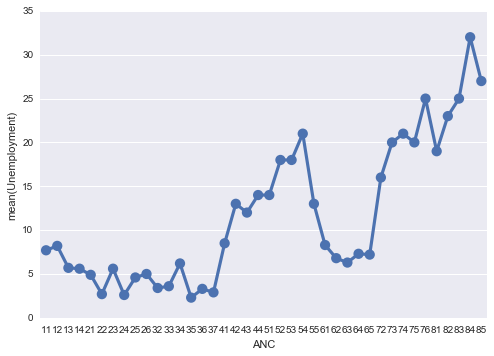

In [38]:
tmpdf = df[['Unemployment', 'ANC']]
sns.pointplot(x='ANC', y='Unemployment', data=tmpdf)
plt.show()

Plot the housing prices per ANC.

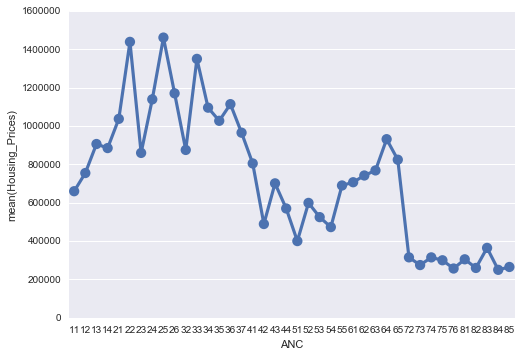

In [39]:
tmpdf = df[['Housing_Prices', 'ANC']]
sns.pointplot(x='ANC', y='Housing_Prices', data=tmpdf)
plt.show()

In [40]:
# create hour, day, and month columns from the crime's end date
if 'END_DATE' in df:
    # convert END_DATE to datetime
    df.END_DATE = pd.to_datetime(df.END_DATE)

    # add the month of the crime
    df['CRIME_MONTH'] = df.END_DATE.map(lambda x: x.month)
    df.CRIME_MONTH = df.CRIME_MONTH.astype('int64')

    # add day of the month
    df['CRIME_DAY'] = df.END_DATE.map(lambda x:x.day)
    df.CRIME_DAY = df.CRIME_DAY.astype('int64')

    # add hour of the day
    df['CRIME_HOUR'] = df.END_DATE.map(lambda x:x.hour)
    df.CRIME_HOUR = df.CRIME_HOUR.astype('int64')

In [41]:
# calculate moon phase, http://en.wikipedia.org/wiki/Lunar_phase#Lunar_phase_calculation
import datetime, math
from decimal import *

def calculate_moon_phase(now=None): 
    '''
    Cacluates the phase of the moon giving a date.
    
    Args:
        now (datetime): The datetime to determine the phase of the moon.
    Returns:
        int: The moon phase where 0: New Moon, 1: Waxing Crescent, 2: First Quarter, 3: Waxing Gibbous, 
        4: Full Moon, 5: Waning Gibbous, 6: Last Quarter, and 7: Waning Crescent
    '''
    if now is None: 
        now = datetime.datetime.now()

    diff = now - datetime.datetime(2001, 1, 1)
    days = Decimal(diff.days) + (Decimal(diff.seconds) / Decimal(86400))
    lunations = Decimal("0.20439731") + (days * Decimal("0.03386319269"))
    pos = lunations % 1
 
    index = (pos * Decimal(8)) + Decimal("0.5")
    return int(math.floor(index))

In [42]:
# create a moon phase column based on the end date of the crime
if 'END_DATE' in df:
    # add moon phase attribute
    df['MOON_PHASE'] = df.END_DATE.map(lambda x: calculate_moon_phase(x))
    df.MOON_PHASE = df.MOON_PHASE.astype('int64')
    
    # remove crime END_DATE as we no longer need it
    del df['END_DATE']

Plot the number of offense for each moon phase. Looks like there is less crime for a new moon and waning crescent. Crime doesn't seem to be widely effected by the phase of the moon; i.e., werewolves. Therefore, the moon phase will be removed.

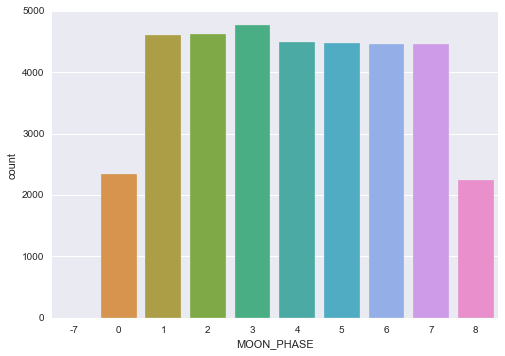

In [43]:
# plot the number of crimes for each moon phase
tmpdf = df[['MOON_PHASE', 'OFFENSE_Code']]
ax = sns.countplot(x='MOON_PHASE', data=tmpdf)
plt.show()

In [44]:
# delete feature since it is so uniform
if 'MOON_PHASE' in df:
    del df['MOON_PHASE']

#### One Hot Encode Category Data

All categorical data are ordinal or continuous for all attributes except for OFFENSE_Code. This attribute will be one-hot encoded when it is not the target.

In [45]:
# create dummy codes given a list of attributes and dataframe
def dummy_code(attrib_list, df):
    for attrib in (attrib_list):
        tmp_df = pd.get_dummies(df[attrib], prefix=attrib)
        df = pd.concat((df, tmp_df),axis=1) # add back into the dataframe
    
        del df[attrib] # remove attribe
    return df

#### Attribute Representation
All attributes are properly represented.

In [46]:
# view attribute representation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36489 entries, 0 to 36488
Data columns (total 18 columns):
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
PSA_ID                  36489 non-null int64
OFFENSE_Code            36489 non-null int64
Latitude                36489 non-null float64
Longitude               36489 non-null float64
Max_Temp                36489 non-null int64
Min_Temp                36489 non-null int64
Max_Humidity            36489 non-null int64
Min_Humidity            36489 non-null int64
Max_Pressure            36489 non-null float64
Min_Pressure            36489 non-null float64
Precipitation           36489 non-null float64
Housing_Prices          36489 non-null int64
Unemployment            36489 non-null float64
CRIME_MONTH             36489 non-null int64
CRIME_DAY               36489 non-null int64
CRIME_HOUR              36489 non-null int64
dtypes: float64(6), int64(12)
memory usage: 5.3 MB


#### Example record

In [47]:
# print a data record for a given row index value
df.ix[1234]

ANC                         11.000000
NEIGHBORHOOD_CLUSTER         2.000000
PSA_ID                     302.000000
OFFENSE_Code                 3.000000
Latitude                    38.927685
Longitude                  -77.028497
Max_Temp                    74.000000
Min_Temp                    64.000000
Max_Humidity                73.000000
Min_Humidity                53.000000
Max_Pressure                30.400000
Min_Pressure                30.290000
Precipitation                0.010000
Housing_Prices          660000.000000
Unemployment                 7.700000
CRIME_MONTH                  9.000000
CRIME_DAY                   26.000000
CRIME_HOUR                   3.000000
Name: 1234, dtype: float64

#### Setup Features [X] and Target [y]

- Create temporary dataframe from master dataframe
- Save off target and delete attribute
- Dummy code nominal attributes and delete original attribute
- Save off features

Classification Task 1

In [48]:
# create offense attribute names and values
task1 = df.copy()
clf_offense_y = task1['OFFENSE_Code']
del task1['OFFENSE_Code']

clf_offense_X_names = task1.columns.values
clf_offense_X = task1

print(task1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36489 entries, 0 to 36488
Data columns (total 17 columns):
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
PSA_ID                  36489 non-null int64
Latitude                36489 non-null float64
Longitude               36489 non-null float64
Max_Temp                36489 non-null int64
Min_Temp                36489 non-null int64
Max_Humidity            36489 non-null int64
Min_Humidity            36489 non-null int64
Max_Pressure            36489 non-null float64
Min_Pressure            36489 non-null float64
Precipitation           36489 non-null float64
Housing_Prices          36489 non-null int64
Unemployment            36489 non-null float64
CRIME_MONTH             36489 non-null int64
CRIME_DAY               36489 non-null int64
CRIME_HOUR              36489 non-null int64
dtypes: float64(6), int64(11)
memory usage: 5.0 MB
None


Classification Task 2

In [49]:
# create ANC attribute names and values
task2 = df.copy()
clf_anc_y = task2['ANC']
del task2['ANC']
# remove Unemployment and Housing_Prices because you will not have this information from crime reports
del task2['Unemployment']
del task2['Housing_Prices']

# dummy code OFFENSE_Code
task2 = dummy_code(['OFFENSE_Code'], task2)

clf_anc_X_names = task2.columns.values
clf_anc_X = task2.copy()

print(task2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36489 entries, 0 to 36488
Data columns (total 23 columns):
NEIGHBORHOOD_CLUSTER    36489 non-null int64
PSA_ID                  36489 non-null int64
Latitude                36489 non-null float64
Longitude               36489 non-null float64
Max_Temp                36489 non-null int64
Min_Temp                36489 non-null int64
Max_Humidity            36489 non-null int64
Min_Humidity            36489 non-null int64
Max_Pressure            36489 non-null float64
Min_Pressure            36489 non-null float64
Precipitation           36489 non-null float64
CRIME_MONTH             36489 non-null int64
CRIME_DAY               36489 non-null int64
CRIME_HOUR              36489 non-null int64
OFFENSE_Code_1          36489 non-null uint8
OFFENSE_Code_2          36489 non-null uint8
OFFENSE_Code_3          36489 non-null uint8
OFFENSE_Code_4          36489 non-null uint8
OFFENSE_Code_5          36489 non-null uint8
OFFENSE_Code_6          36

#### Size of Dataset and Target Details

Classification Task 1

Size of the dataset: (36489, 18)
Number of unique offenses: 9
['THEFT/OTHER' 'THEFT F/AUTO' 'BURGLARY' 'ASSAULT W/DW' 'ROBBERY'
 'MOTOR VEHICLE THEFT' 'HOMICIDE' 'SEX ABUSE' 'ARSON']

Offenses Percentage
OFFENSE_Code
1    38.367727
2    30.063855
3     6.944559
4     6.549919
5     9.186330
6     7.657102
7     0.433007
8     0.748171
9     0.049330
Name: OFFENSE_Code, dtype: float64
Mean: 11.1111111111, Standard deviaion: 13.6917157939


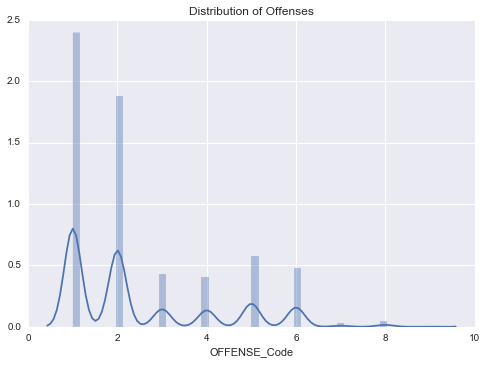

In [50]:
# examine what our data
print('Size of the dataset:', df.shape)
print('Number of unique offenses:', len(df.OFFENSE_Code.unique()))
print(clf_offense_descriptions)

print('')
print('Offenses Percentage')
y_series = pd.Series(clf_offense_y)
y_tot = y_series.count()
y_grp = y_series.groupby(y_series)
y_pct = y_grp.count() / y_tot * 100.
print(y_pct)
print('Mean: {}, Standard deviaion: {}'.format(y_pct.mean(), y_pct.std()))

# plot distribution
ax = sns.distplot(clf_offense_y)
plt.title('Distribution of Offenses')
plt.show()

Classification Task 2

Size of the dataset: (36489, 18)
Number of unique ANC types: 40

ANC Percentage
ANC
11    5.744197
12    5.313930
13    2.071857
14    0.956453
21    2.170517
22    5.467401
23    4.014909
24    0.422045
25    2.866617
26    3.228370
32    0.476856
33    1.244211
34    0.600181
35    1.685439
36    0.775576
37    0.622105
41    2.318507
42    2.663816
43    2.907726
44    1.340130
51    1.101702
52    1.934830
53    4.099866
54    3.280441
55    3.524350
61    3.296884
62    4.524651
63    3.242073
64    2.225328
65    3.058456
72    2.195182
73    2.699444
74    2.403464
75    2.060895
76    2.639152
81    2.408945
82    2.258215
83    2.417167
84    1.740250
85    1.997862
Name: ANC, dtype: float64
Mean: 2.5, Standard deviaion: 1.32662131416


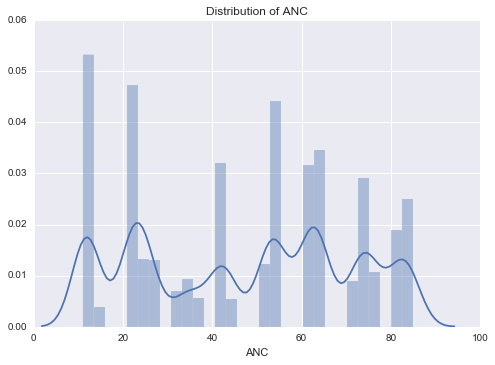

In [51]:
# examine what our data
print('Size of the dataset:', df.shape)
print('Number of unique ANC types:', len(df.ANC.unique()))

print('')
print('ANC Percentage')
y_series = pd.Series(clf_anc_y)
y_tot = y_series.count()
y_grp = y_series.groupby(y_series)
y_pct = y_grp.count() / y_tot * 100.
print(y_pct)
print('Mean: {}, Standard deviaion: {}'.format(y_pct.mean(), y_pct.std()))

# plot distribution
ax = sns.distplot(clf_anc_y)
plt.title('Distribution of ANC')
plt.show()

#### Normalize 

Our data has different scales so it will require normalization. We will normalize our data on the training data. This is because we don't want to find out our mean and standard deviation from the testing data. This would be snooping. We leverage scaling in our pipeline statement.

<a id='describe_final_dataset'></a>
### 1.2 - Purpose of Data Set
From data exploration in Lab 1 and the Mini-Lab, we have two potential response variables: Crime_Type (Property crime vs. Violent crime), and Offense_Code (The more specific type of offense: Homicide, Robbery, Theft, Arson, etc.). The goal is to provide the police with a model that can predict or classify a crime based on the available explanatory variables.

One problem with this data is that the victim profile data is missing (due to privacy concerns, and the fact that property crimes are not necessarily because of the owner's profile). The explanatory variables for this dataset focus on time and locations. We believe that the detection/classification of a Violent crime would be based primarily on the victim's characteristics, and not exclusively on the location or time. The other problem with this data is that (fortunately) there are far fewer violent crimes than there are property crimes (approximately 83% of the 36000+ crime reports are against property rather than persons), so we have very imbalanced classification task.

Our exploration of the variables seem to indicate that time (not necessarily the day, but the time during the day) is one of the more significant factors. We saw this in the SHIFT variable (which gives the Police duty shift that responded to the call). When we broke the time down into individual hours of the day, we saw a pronounced cyclic effect, where night-time crimes were far more likely than daytime crimes. Weekend crimes were slightly more likely than crimes during the work week, and monthly trends appeared to be opposite intuition (fall crimes were more likely than winter or summer crimes).

Location also appeared to have some influence, but the way the locations were grouped altered the effect significantly. Different political areas (Wards and the subordinate Association Neighborhood Committees) showed a different trend than using global locations (Latitude and Longitude). Police districts (and their subordinate Police Service Areas) showed a different trend than the Ward/ANC grouping. This tells us that there are some location effects, but it is difficult to separate them out due to the correlation between geo-physical areas and the different (but overlapping) political mappings.

From what we can tell, due to our previous exploration, the existing variables are not able to properly perform the classification tasks alone. As such, we have looked at including other data to attempt to fill in the picture more completely. As mentioned before, victim profile would be interesting and probably very helpful, but we would not be able to get access to that due to privacy concerns. We are examining environmental data (primarily weather data, but we also have access to lunar phases to estimate luminance for night crimes or the psychological impact of lunacy. In addition to weather data, the number of people on foodstamps per ANC was added to provide more population demographic to help with prediction. 

For this lab, the focus will be on classifying the Offense_Code (type of offense) classification instead of the type of crime, Crime_Type (Property vs. Violent crime) for task 1 and classifying the ANC classification for task 2. Our tasks for this lab will be to leverage the crime data plus other supplimental data to predict the class of crime and the ANC where the crime was comitted.

<a id="modeling_and_evaluation"></a>
## 2 - Modeling and Evaluation

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Modeling and Evaluation (<b>70 points total</b>)</h3>
    <ul><li>[<b>10 points</b>] [2.1 - Choose and explain your evaluation metrics](#choose_and_explain) that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.</li>
    <li>[<b>10 points</b>] [2.2 - Choose the method you will use for dividing your data](#choose_the_method) into training and testing splits (i.e., are you Stratified 10-fold cross validataion? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.</li>
    <li>[<b>20 points</b>] [2.3 - Create three different classification/regression models](#create_models) for each task (e.g., random forest KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!</li>
    <li>[<b>10 points</b>] [2.4 - Analyze the results using your chosen method of evaluation](#analyze_results). Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.</li>
    <li>[<b>10 points</b>] [2.5 - Discuss the advantages of each model](#discuss_models) for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques - be sure they are appropriate for your chosen method of validation.</li>
    <li>[<b>10 points</b>] [2.6 - Which attributes from your analysis are most important](#important_attributes)? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesis about why certain attributes are more important than others for a given classification task.</li>
   </ul>
</div>



<a id='choose_and_explain'></a>
### 2.1 - Choose and explain your evaluation metrics
Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions. **(10 points total)**

#### Answer
Our high-level goal or business metric of the Washington D.C. crime dataset is to classify crime offense and the ANC the crime occurred.

Both classification tasks are multiclass problem. For the offense classification, the class frequency is shown below. The class is heavily imbalanced with a standard deviation of 13.7 while task 2 classification is more uniform with a standard deviation of 1.3. 

With an imbalanced, multiclass problem, it is important to limit the false positives. Therefore, precision will be an important measure to ensure the classifier doesn't label a sample positive that is negative.  For both tasks, the average precision score will be used to determine the best algorithm. It is a measure of the area under the precision-recall curve. Once a best algorithm is chosen, its confusion matrix, precision, and recall will be determined. An example confusion matrix is shown below.

![Confusion Matrix](images/confusion_matrix.png "Example Confusion Matrix") 
<p style='text-align: center;'>
Example Confusion Matrix
</p>

<a id='choose_the_method'></a>
### 2.2 - Choose the method you will use for dividing your data
Choose the method you will use for dividing your data into training and testing splits (i.e., are you Stratified 10-fold cross validataion? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time. **(10 points total)**

#### Answer
A simple train/test split provides a split of the data preferrably random into a buckets to train a model and then test it. With this approach only one model is trained and tested. If we have imbalanced classes like task 1, then we will likely end up with a training model with a poor representation of our dataset. Or, the test dataset might not have enough class representation to validate the model. 

For selecting the optimal algorithm and parameters, the dataset will be split into roughly 70/30 to determine best algorithm and parameters with a stratified cross validation of 10. The best algorithm will then be used agaisnt the full dataset to retrain and test with a stratified cross validation of 10. If the algorithm provides a class weight parameter then it will be used to penalize more frequent classes.


<center>Offense Code</center>

|Class|Frequency|
|:---:|:-----|
|1| 38.367727|
|2| 30.063855|
|3| 6.944559|
|4| 6.549919|
|5| 9.186330|
|6| 7.657102|
|7| 0.433007|
|8| 0.748171|
|9| 0.049330|

The difference between stratified and non-stratified approach for our imbalance class is shown below.

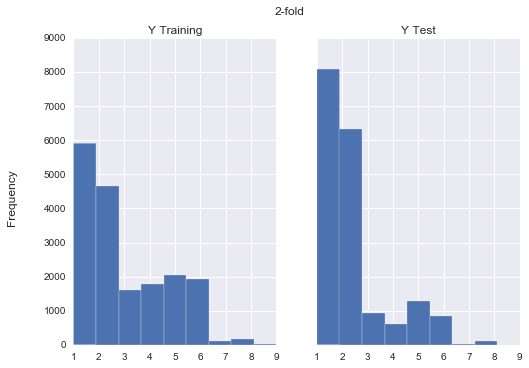

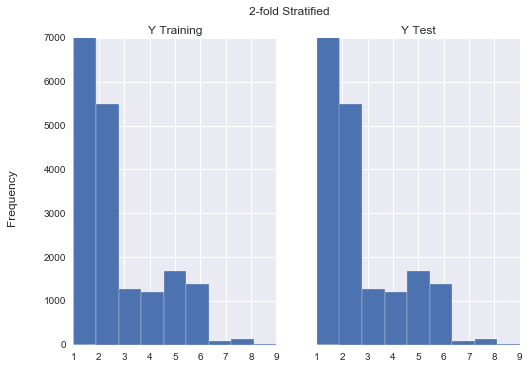

In [52]:
# function to plot class distribution
def plot_class_dist(train, test, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(train, bins=len(df.OFFENSE_Code.unique()))
    ax1.set_title('Y Training')
    ax2.hist(test, bins=len(df.OFFENSE_Code.unique()))
    ax2.set_title('Y Test')
    fig.suptitle(title)
    fig.text(.01, .5, 'Frequency', va='center', rotation='vertical')
    plt.show()    

# k-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, random_state=0)
for train, test in kf.split(clf_offense_X, clf_offense_y):  
    plot_class_dist(clf_offense_y.ix[train], clf_offense_y.ix[test], '2-fold')
    break # only plot one
    
# stratified k-fold
skf = StratifiedKFold(n_splits=2, random_state=0)
for train, test in skf.split(clf_offense_X, clf_offense_y):  
    plot_class_dist(clf_offense_y.ix[train], clf_offense_y.ix[test], '2-fold Stratified')
    break # only plot one

<a id='create_models'></a>
### 2.3 - Create three different classification/regression models
Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms! **(20 points total)**

#### 2.3.1 Classification Task 1
Train and test three algorithms to classify offense code. The three algorithms tested with various parameters are KNeighborsClassifer, RandomForestClassifier, and GaussianNB. Several parameters were adjusted utilizing GridSearchCV to determine which classifier and params were the best based on its score against the test data. See Section 4.2 for more details about Pipeline and GridSearchCV.

##### 2.3.1.1 Determine best algorithm and parameters
The data was scaled and dimensions reduced for KNeighborsClassifier and GaussianNB. 

In [53]:
# CAUTION: takes a while to run

# create pipeline of steps
pipe = Pipeline(steps=[('scale', StandardScaler()),
                       ('reduce', PCA(svd_solver='randomized')),
                       ('clf', KNeighborsClassifier())])

param_grid = [{'clf': [KNeighborsClassifier(algorithm='auto', n_jobs=-1)],
              'clf__n_neighbors': [100, 150, 200],
              'clf__weights': ['uniform', 'distance']},
              {'clf': [RandomForestClassifier(n_estimators=50, 
                                              n_jobs=-1, class_weight='balanced')],
               'scale': [None],
               'clf__n_estimators': [50, 100, 200]},
              {'clf': [GaussianNB()]}]

# evaluate classifiers with half the data to speed things up
X_train, X_test, y_train, y_test = train_test_split(clf_offense_X, clf_offense_y, test_size=.3, 
                                                    random_state=0, stratify=clf_offense_y)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=10)
%timeit grid.fit(X_train, y_train)

print('Best params:\n{}\n'.format(grid.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid.best_score_))
print('Test set score: {:.2f}'.format(grid.score(X_test, y_test)))

1 loop, best of 3: 8min 43s per loop
Best params:
{'clf': RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'scale': None, 'clf__n_estimators': 200}

Best cross-validation score: 0.45
Test set score: 0.46


Random guess for 9 classes would be 1/9 = 0.11.

##### 2.3.1.2 Use best algorithm
Use best classifer against the normal data set and leverage `class_weight` to penalize the more frequent classes.

In [56]:
# leveraging concept from 06 Classification notebook
yhat_offense = np.zeros(clf_offense_y.shape)

# weight classes
class_weight = {1:.05, 2:.05, 3:.1, 4:.1, 5:.1, 6:.1, 7:.15, 8:.15, 9:.2}

#  not using pipeline so we can get access to the feature importance attribute
clf_offense = RandomForestClassifier(n_estimators=200,
                                     n_jobs=-1, class_weight=class_weight)

skf = StratifiedKFold(n_splits=10, random_state=0)
scaler = StandardScaler()
for train, test in skf.split(clf_offense_X, clf_offense_y):  
    scaler.fit(clf_offense_X.ix[train]) # fit scaler data to training data
    clf_offense.fit(scaler.transform(clf_offense_X.ix[train]), clf_offense_y.ix[train])
    yhat_offense[test] = clf_offense.predict(scaler.transform(clf_offense_X.ix[test]))

print('Random Forest accuracy aggregate', metrics.accuracy_score(clf_offense_y, yhat_offense))

Random Forest accuracy aggregate 0.0832579681548


Result is no better than random guessing.

<a id='sec232'></a>
#### 2.3.2 Classification Task 2

Train and test three algorithms to classify ANC. The three algorithms tested with various parameters are KNeighborsClassifer, RandomForestClassifier, and GaussianNB. Several parameters were adjusted utilizing GridSearchCV to determine which classifier and params were the best based on its score against the test data. See Section 4.2 for more details about Pipeline and GridSearchCV.

In [57]:
# CAUTION: takes a while to run

# create pipeline of steps
pipe = Pipeline(steps=[('scale', StandardScaler()),
                 ('reduce', PCA(svd_solver='randomized')),
                 ('clf', KNeighborsClassifier())])

param_grid = [{'clf': [KNeighborsClassifier(algorithm='auto', n_jobs=-1)],
              'clf__n_neighbors': [100, 150, 200],
              'clf__weights': ['uniform', 'distance']},
              {'clf': [RandomForestClassifier(n_estimators=50, 
                                              n_jobs=-1, class_weight='balanced')],
               'scale': [None],
               'clf__n_estimators': [50, 100, 200]},
              {'clf': [GaussianNB()]}]

# evaluate classifiers with half the data to speed things up
X_train, X_test, y_train, y_test = train_test_split(clf_anc_X, clf_anc_y, test_size=.3, 
                                                    random_state=0, stratify=clf_anc_y)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=10)
%timeit grid.fit(X_train, y_train)

print('Best params:\n{}\n'.format(grid.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid.best_score_))
print('Test set score: {:.2f}'.format(grid.score(X_test, y_test)))

1 loop, best of 3: 16min 28s per loop
Best params:
{'clf': RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'scale': None, 'clf__n_estimators': 200}

Best cross-validation score: 0.91
Test set score: 0.91


Random guess for 40 classes would be 1/40 = 0.025.

In [58]:
# leveraging concept from 06 Classification notebook
yhat_anc = np.zeros(clf_offense_y.shape)

# classifier                           
clf_anc = RandomForestClassifier(n_estimators=200,
                                 n_jobs=-1, class_weight='balanced')

scaler = StandardScaler()
skf = StratifiedKFold(n_splits=10, random_state=0)
for train, test in skf.split(clf_anc_X, clf_anc_y):
    scaler.fit(clf_anc_X.ix[train]) # fit scaler data to training data
    clf_anc.fit(scaler.transform(clf_anc_X.ix[train]), clf_anc_y.ix[train])
    yhat_anc[test] = clf_anc.predict(scaler.transform(clf_anc_X.ix[test]))

print('Random Forest accuracy aggregate', metrics.accuracy_score(clf_anc_y, yhat_anc))

Random Forest accuracy aggregate 0.95952204774


Predicting ANC from a crime data has excellent results.

<a id='analyze_results'></a>
### 2.4 - Analyze the results using your chosen method of evaluation
Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model. **(10 points total)**

#### 2.4.1 Classification Task 1

The confusion matrix heatmap and classification report show that our classifier performed poorly on predicting the offense code. The overall accuracy for the classifer is 8%. The best recall and precision was 16% and 19% respectively for THEFT/AUTO. In summary, we do not have good data to accurately classify a crime offense.

The heatmap confusion matrix is an enhancement over the out of the box confusion matrix with not column/row labels and no color indicator for the third dimension. This plot makes it easier for the viewer to see where the concentration of data lies. A good classifier would have a darker color diaganol incidating that True and Predicted correlate.

The heatmap classification report is an enhancement over the out of the box classification report regarding its display of precision and recall for the classes. This plot makes it easier for the viewer to see where the concentraction of data lies regarding the classes. In addition, the actual class names eliminates manually mapping a number to a name.

Offense Code Random Forest accuracy aggregate 0.0832579681548



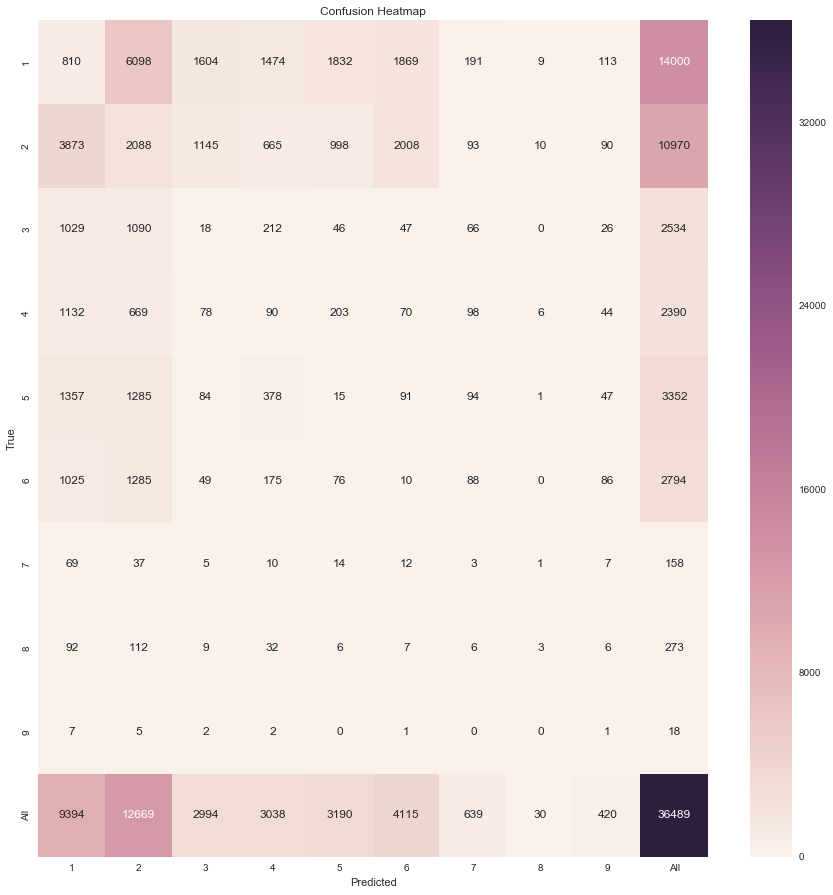

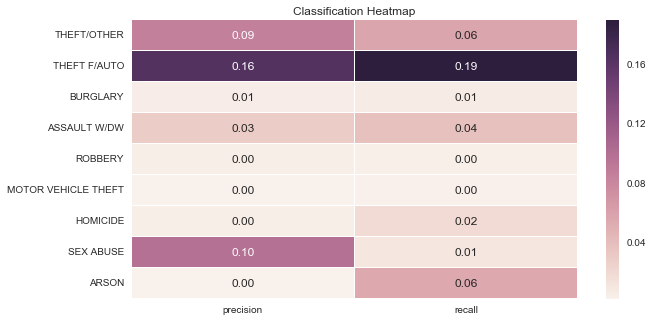

In [59]:
print('Offense Code Random Forest accuracy aggregate', metrics.accuracy_score(clf_offense_y, yhat_offense))
print('')

# print a crosstab confusion matrix
ct = pd.crosstab(clf_offense_y, yhat_offense.astype(int), rownames=['True'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(15, 15))
ax = sns.heatmap(ct, annot=True, fmt='d', linewidths=0)
ax.set_title('Confusion Heatmap')
plt.show()
print('')

# nicer classification report
precision_array = metrics.precision_score(clf_offense_y, yhat_offense, average=None)
recall_array = metrics.recall_score(clf_offense_y, yhat_offense, average=None)

df_classification_report = pd.DataFrame({'precision':precision_array, 'recall':recall_array}, 
                                        index=clf_offense_descriptions)


plt.figure(figsize=(10, 5))
ax = sns.heatmap(df_classification_report, annot=True, fmt='.2f', linewidths=.1)
ax.set_title('Classification Heatmap')
plt.show()

#### 2.4.2 Classification Task 2

The confusion matrix heatmap and classification report show that our classifier performed very well on predicting the ANC. The overall accuracy for the classifer is 96%. The best recall and precision was 100% for ANC 24 or 2D. In summary, we do have good data to accurately classify ANC based on crime data.

The heatmap confusion matrix is an enhancement over the out of the box confusion matrix with not column/row labels and no color indicator for the third dimension. This plot makes it easier for the viewer to see where the concentration of data lies. A good classifier would have a darker color diaganol incidating that True and Predicted correlate.

The heatmap classification report is an enhancement over the out of the box classification report regarding its display of precision and recall for the classes. This plot makes it easier for the viewer to see where the concentraction of data lies regarding the classes. In addition, the actual class names eliminates manually mapping a number to a name.

ANC Random Forest accuracy aggregate 0.95952204774



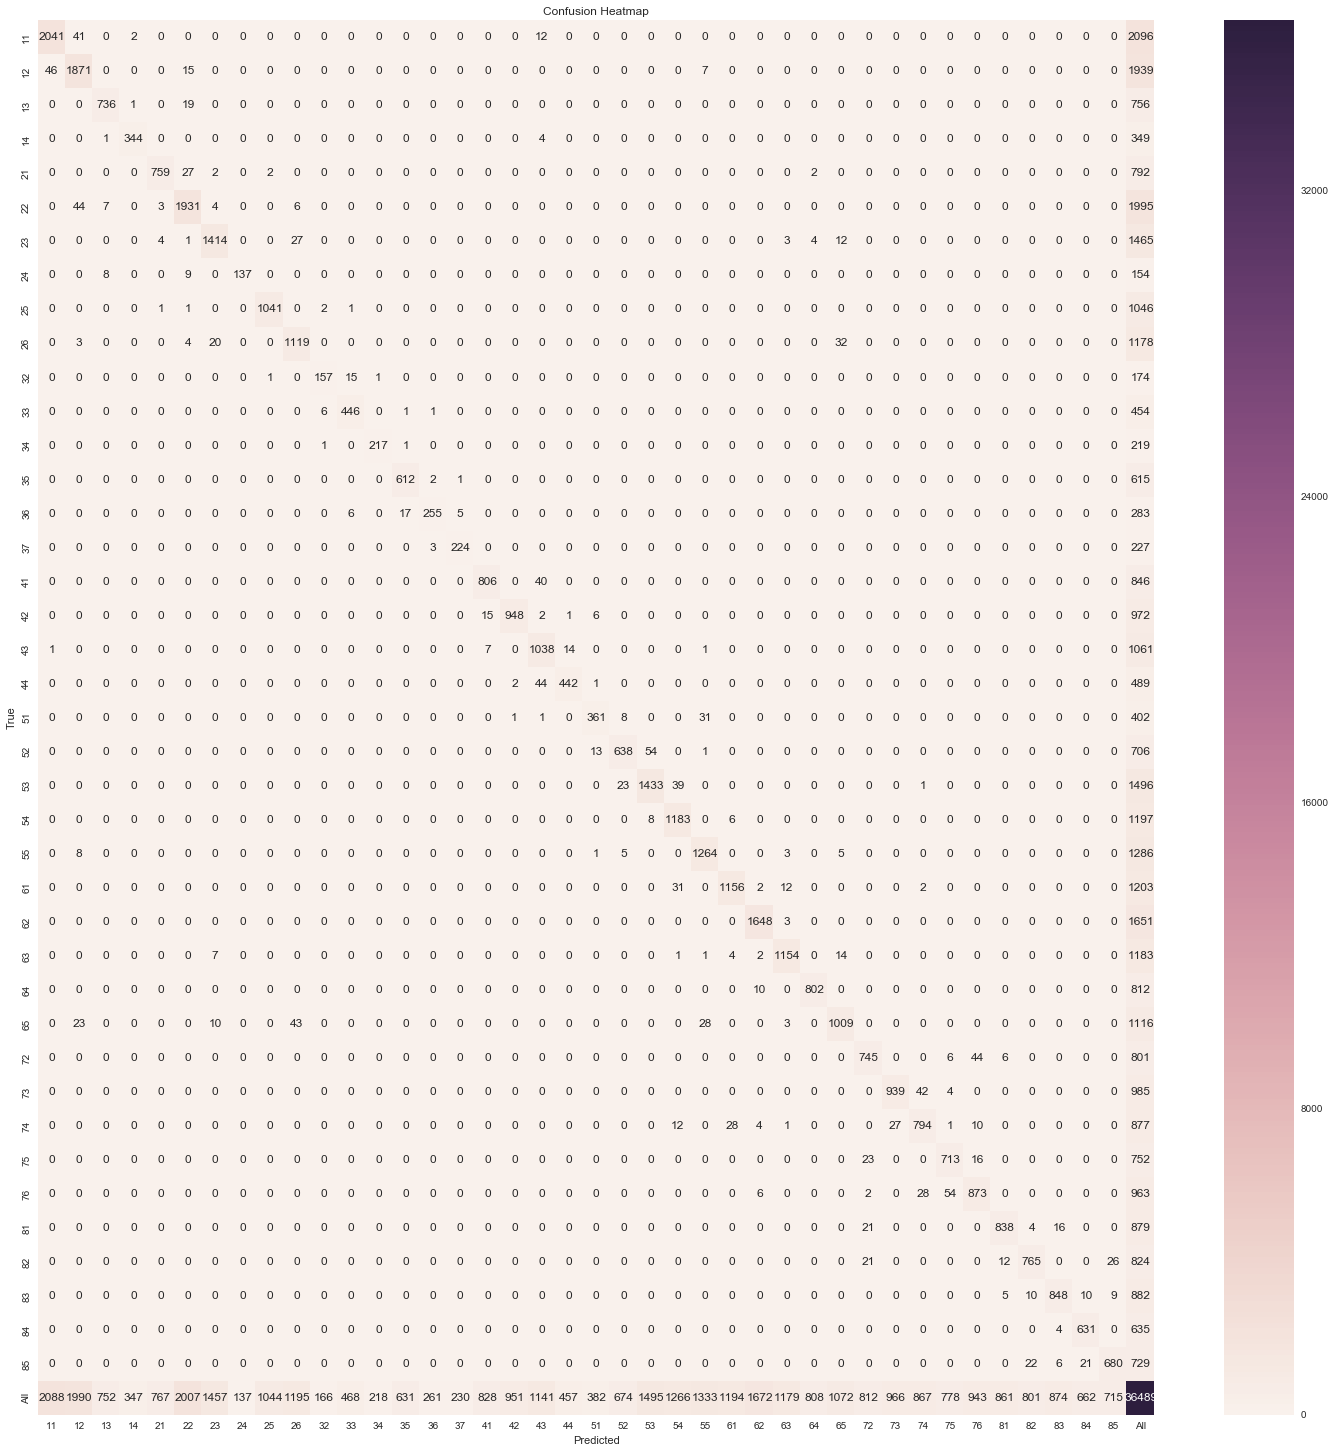

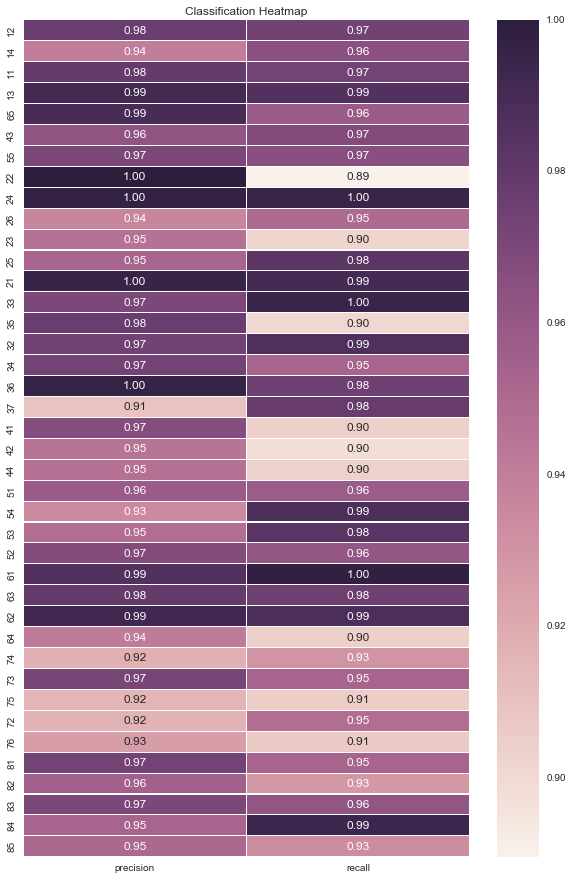

In [60]:
print('ANC Random Forest accuracy aggregate', metrics.accuracy_score(clf_anc_y, yhat_anc))
print('')

# print a crosstab confusion matrix
ct = pd.crosstab(clf_anc_y, yhat_anc.astype(int), rownames=['True'], colnames=['Predicted'], margins=True)
# print(ct)
plt.figure(figsize=(25, 25))
# ax = sns.heatmap(ct, annot=True, fmt='d')
ax = sns.heatmap(ct, annot=True, fmt='d', linewidths=0)
ax.set_title('Confusion Heatmap')
plt.show()
print('')

# nicer classification report
precision_array = metrics.precision_score(clf_anc_y, yhat_anc, average=None)
recall_array = metrics.recall_score(clf_anc_y, yhat_anc, average=None)

df_classification_report = pd.DataFrame({'precision':precision_array, 'recall':recall_array}, 
                                        index=clf_anc_y.unique())


plt.figure(figsize=(10, 15))
ax = sns.heatmap(df_classification_report, annot=True, fmt='.2f', linewidths=.1)
ax.set_title('Classification Heatmap')
plt.show()

<a id='discuss_models'></a>
### 2.5 - Discuss the advantages of each model
Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques - be sure they are appropriate for your chosen method of validation. **(10 points total)**

**TODO**

<a id='important_attributes'></a>
### 2.6 - Which attributes from your analysis are most important
Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesis about why certain attributes are more important than others for a given classification task. **(10 points total)**

#### 2.6.1 Classification Task 1
Longitude, Latitude, and CRIME_HOUR are the most important attributes or features in classifying the type of offense of a crime.

Important Features for Offense Classification
[ 0.02281465  0.02455534  0.04055031  0.12084413  0.12330736  0.06253759
  0.06180181  0.05798191  0.06632118  0.06481455  0.06549673  0.03512281
  0.02235642  0.02183933  0.04316893  0.06590507  0.10058189]

['ANC' 'NEIGHBORHOOD_CLUSTER' 'PSA_ID' 'Latitude' 'Longitude' 'Max_Temp'
 'Min_Temp' 'Max_Humidity' 'Min_Humidity' 'Max_Pressure' 'Min_Pressure'
 'Precipitation' 'Housing_Prices' 'Unemployment' 'CRIME_MONTH' 'CRIME_DAY'
 'CRIME_HOUR']


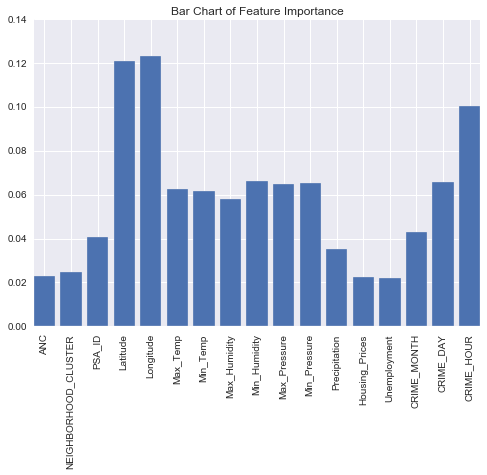

In [61]:
print('Important Features for Offense Classification')
print(clf_offense.feature_importances_)
print('')

print(clf_offense_X_names)

fig, ax = plt.subplots()
plt.title('Bar Chart of Feature Importance')
ax.set_xticks(range(len(clf_offense.feature_importances_)))
ax.set_xticklabels(clf_offense_X_names, rotation=90)
plt.bar(range(len(clf_offense.feature_importances_)), clf_offense.feature_importances_, align='center')
plt.show()

#### 2.6.1 Classification Task 2
NEIGHBORHOOD_CLUSTER, PSA_ID, Longitude, and Latitude are the most important attributes or features in classifying the type of offense of a crime.

Important Features for ANC Classification
[  1.87902189e-01   1.90123196e-01   2.22642518e-01   2.42738181e-01
   1.48439163e-02   1.45867908e-02   1.36668643e-02   1.50974142e-02
   1.54019205e-02   1.56368379e-02   8.66492788e-03   1.01433265e-02
   1.45787616e-02   2.06529356e-02   3.33986297e-03   3.05636387e-03
   1.76354211e-03   1.32949473e-03   1.55646338e-03   1.54888774e-03
   2.06925650e-04   4.88565217e-04   3.01139079e-05]

['NEIGHBORHOOD_CLUSTER' 'PSA_ID' 'Latitude' 'Longitude' 'Max_Temp'
 'Min_Temp' 'Max_Humidity' 'Min_Humidity' 'Max_Pressure' 'Min_Pressure'
 'Precipitation' 'CRIME_MONTH' 'CRIME_DAY' 'CRIME_HOUR' 'OFFENSE_Code_1'
 'OFFENSE_Code_2' 'OFFENSE_Code_3' 'OFFENSE_Code_4' 'OFFENSE_Code_5'
 'OFFENSE_Code_6' 'OFFENSE_Code_7' 'OFFENSE_Code_8' 'OFFENSE_Code_9']


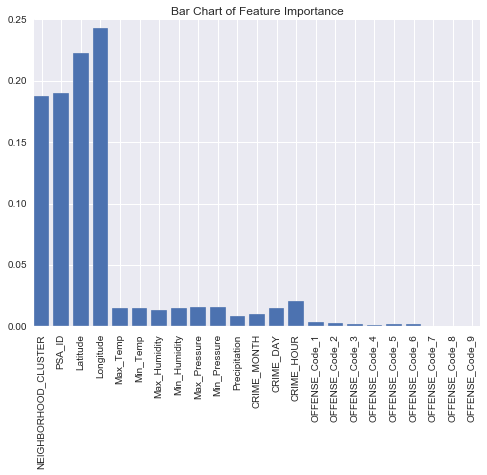

In [62]:
print('Important Features for ANC Classification')
print(clf_anc.feature_importances_)
print('')

print(clf_anc_X_names)

fig, ax = plt.subplots()
plt.title('Bar Chart of Feature Importance')
ax.set_xticks(range(len(clf_anc.feature_importances_)))
ax.set_xticklabels(clf_anc_X_names, rotation=90)
plt.bar(range(len(clf_anc.feature_importances_)), clf_anc.feature_importances_, align='center')
plt.show()

<a id="deployment"></a>
## 3 - Deployment

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Deployment (<b>5 points total</b>)</h3>
    <ul><li>[3.1 - How useful is your model](#model_usefulness) for interested parties (i.e., the companies or organizations that might want to use it for prediction)?</li>
    <li>[3.2 - How would you measure the model's value](#model_value) if it was used by these parties?</li>
    <li>[3.3 - How would you deploy your model](#model_deploy) for interested parties?</li>
    <li>[3.4 - What other data should be collected](#other_data)?</li>
    <li>[3.5 - How often would the model need to be updated](#model_update), etc.?</li>
   </ul>
</div>

<a id='model_usefulness'></a>
### 3.1 - How useful is your model
The D.C. Metro Police Department (MPD) provides data to two groups (the Strategic Services and Corporate Support Bureaus) which perform research, analysis, management, procurement, and other support functions to aid in the strategic direction for the MPD.  Our model would be one additional tool these bureaus could use to aid their crime analysis and support their recommendations for deployment/reallocation of resources, procurement of new tools/assets, along with hiring and training personnel.

Our research continues to look for new ways to use the existing data to glean useful trends that could be critical in strategic deployment of assets - the ability to predict the type of crime that might be committed (or the geo-political region in which a crime might be committed) given available (or future) conditions could help minimize or mitigate the effects of said crime.

<a id='model_value'></a>
### 3.2 - How would you measure the model's value
There is a very large repository of historic data for the MPD, dating back to 2009 (at least).  This gives us a tremendous set of data from which to train, tune, and test our models.  We can use these historic data to measure how well the model works under a variety of conditions and trends. We can also examine true positive and false negative rates for the most severe crime categories (homicide, sex abuse, assault, robbery, arson) and seek to tune the model to produce more favorable scores.

Our dataset contains the time period in which a crime *might* have occurred, and the date/time the police responded to the crime.  If our model can aid in the prediction or classification of crimes **during** the period, there may be a better chance of preventing that crime in the first place, or reducing the time between occurrence and response.  Reduced response time might be another way of measuring the model's value.

As obvious as it seems, the effectiveness of the model may be measured by the impact after the implementation of the model. Assuming the entirety of the output of the model is taken into consideration and the aspects are focused on by all parties involved, the change in predicted crime rates would be the true measure of value for these models.

<a id='model_deploy'></a>
### 3.3 - How would you deploy your model
We used an online form to request data, which were provided as CSV files.  The fact that there were so many different ways to request the data implies that there is a database behind the scenes.  It would not be difficult to develop software to automatically build test and training sets out of the existing data and run "self-diagnostics" to assess the model's accuracies and applicability to be displayed on a front-end. With a database back-end, it should not be difficult to create a stored procedure that is automatically executed upon addition of new records.  This should remove some of the maintenance and updating for the model.  The model code could also track its own diagnostics and performance data for periodic review by DC MPD analysts to decide if the model needs further tuning or re-training.

In 2015, DC MPD released a new web-based records management system that allows all personnel involved in an investigation to import data for a specific case.  Our dataset included the CCN (Criminal Complaint Number, i.e. the "case" number), which means that the model would possibly have access to additional data that could not be made public (such as victimology or relevant socio-economic factors).  So, integration with their web-based system would be an additional feature/asset that investigators could use.

<a id='other_data'></a>
### 3.4 - What other data should be collected

We have all heard stories of crime victims being "in the wrong place at the wrong time," and the data provided by the D.C. Metro police seem to reinforce that paradigm as all of the explanatory variables are geo-political areas and geo-physical coordinates (the wrong places) and dates/times/duty shift (the wrong times).  However, we have also found that these aspects alone were inadequate. With these shortcomings in mind we sought to include environmental factors (weather and lunar luminance), socio-economic factors (food stamp recipients, percent unemployed by ANC), as well as housing prices to help add visibility to the communities which we are observing.

We felt that, in the case of violent crimes, victimology is the set of factors we would need to make accurate predictions - but we understand that, due to privacy concerns, we would not be able to get these specifics.  We could continue to fumble in the dark about what ancillary factors *might* be truly important; however, Ben had the opportunity to ask some D.C. Metro police officers this very question in person.  Their response was:
- Drug Use
- Unemployment
- Education
- Housing Prices

The team then set out to find sources for these data as they are not part of the original dataset.  Matt's discovery of the food stamp data led us to find information for some of these other variables, but in summary form. For example, http://www.neighborhoodinfodc.org/anc12/Nbr_prof_ancb2.html#sec_2_employment lists the unemployment rate by Advisory Neighborhood Commission (ANC) [for which we do have a variable]; however, it is a single summary value applied to a range of years:

ANC 1B (encoded as "12" in our dataset) reported an unemployment rate of 8.2% (+/- 1.9%) for the period 2010-2014.

This is not something we can easily encode and apply to individual crimes.  Similarly, "education" is reported as the percentage of the ANC population without a high school diploma (for the period 2010-2014).  Further, housing prices are reported as median sales price per ANC for each year (including 2015).  But, again, these summary statistics are difficult to apply to individual crimes.  This is one reason we looked at classifying the ANC given the other factors. See <a href="#sec232">Section 2.3.2</a> for an example of classifying ANC.

One surprising element was Drug Use.  It doesn't appear as a separate Offense Code in our data, nor as a separate "Method" or any other category in our data.  And it is surprisingly absent from our other data sources as well. Since it is considered to be important by the police officers in the field having to deal with crime on a daily basis, one would think it would be *somewhere* in the data.  Our only guess as to why that important factor is not present anywhere is HIPAA restrictions.  Which begs the question: If key/important factors are missing (for arguably good reasons), can **any** model be useful?

<a id='model_update'></a>
### 3.5 - How often would the model need to be updated

In our research, we found trends that would imply a decrease in most crime categories, yet the population appears to increase.  That would imply that our model would have to be adjusted, perhaps, annually.  It is not difficult to believe that the police research branch does not employ some annual review process anyway and make recommendations to redeploy assets in *reaction* to the previous year's activities.

In the case that our model would be attached to the very database in which the reports are fed, therein lies the possibility of allowing the model to update as frequently as the reports are updated. This could allow for a real-time understanding of the crimes being reported versus the usual annual report. 

<a id="exceptional"></a>
## 4 - Exceptional Work

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Exceptional Work (<b>10 points total</b>)</h3>
   <p>Free reign to provide additional analysis. The following are possible ideas:</p>
   <ul>
       <li>Grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?</li>
       <li>Apply Synthetic Minority Over-sampling Technique (SMOTE)</li>
       <li>Utilize pipeline</li>
       <li>Visualize feature importance</li>
       <li>Utilize R implementation of ADA</li>
   </ul>
</div>

### 4.1 - SMOTE
#### 4.1.1 Background
During the mini-lab effort we encountered an obstacle in producing decent models for our data.  Our data is highly imbalanced, with property crimes making up over 83% of the dataset, far outnumbering violent crimes (not that we were hoping for more violent crimes).  As a result, several attempts at fitting/classifying on the binary outcome produced poor results, with several attempts matching a simple assertion for the majority class.

For this effort we decided to examine the effects of a synthetic minority over-sampling technique (SMOTE).  During the mini-lab, we had looked at undersampling the majority class, but the results of the regression did not change much.  Similarly, we looked at oversampling the minority class with replication, but that simply reinforced the fact that the minority class was a rare event, and the models could not adapt.  So when the concept of SMOTE was introduced briefly in class, we thought it might be the way to go with our dataset.

#### 4.1.2 Research and Application Issues
While scikit-learn does not have a native SMOTE module, a contributed library can be installed (http://contrib.scikit-learn.org/imbalanced-learn/install.html).  The documentation and various online forums implied that the method worked on continuous explanatory variables, and that numeric categorical variables were treated as continuous.  This gave us pause to blindly employing this method on our data.  The Police Service Area, for example, is a numeric value, but the leading digit indicates the Police District, and the trailing two digits indicate the subordinate command within the district - so there is no ordinality to the value.  The same is true for the Advisory Neighborhood Committee (ANC) [the leading digit implies the political Ward, and the trailing digit is an ordinal value for a letter designator], and Neighborhood Cluster [cluster 39 is not "greater" than cluster 1].  Also, we have temporal explanatory variables: month of the year, day of the month, day of the week, hour of the day.  While these have an ordinality to them (December always comes after July), they are cyclic - so 1AM on Tuesday is more closely related to 11 PM on Monday than it is to 11 PM on Tuesday (or 1AM on Monday for that matter).  Again, our explanatory variables seemed to be incompatible with the data requirements for the available SMOTE method.  From our exploratory analysis, we know that these variables have some significance as indicators - so we cannot simply throw them out.

The documentation for this method, however, referenced some journal articles on the subject that we reviewed for insight and inspiration.  One of those documents (http://jair.org/media/953/live-953-2037-jair.pdf) described how the continuous-variable SMOTE method worked, but also mentioned future work and variations that *could* be explored further, including a variation on how to treat categorical variables mixed with continuous variables - and that caught our attention.  It required us to think about how we could possibly adapt the method to our data.  For example, we derived geodetic coordinates (Latitude and Longitude) for each crime scene during lab 1, and these geo-political areas cover the full dataset area - meaning that each geodetic coordinate must belong to one, and only one, Police Service Area, one ANC, and one Neighborhood Cluster.  Therefore, we can estimate the PSA, ANC, and Neighborhood given a geodetic coordinate pair.  Which implies that we can (for the SMOTE method) ignore these variables and use the continuous variables Latitude and Longitude to derive the synthetic event - we would then estimate the PSA, ANC, and Neighborhood from the coordinates to use in the model.

Our time variables, however, posed a more difficult challenge.  There really wasn't anything we could substitute for later imputation.  But as we examined the variables more, it became clear that we really did not need to substitute.  The exploratory analysis in the mini-lab showed that the effect of the hour of the day was cyclic, and in a logical way (nighttime crimes had far higher odds than daylight crimes), yet the day of the week was uniform (for the most part: there was a very slight increase in the odds during the weekend, but not as significant as the hour of the day) - so since it was cyclic, an 8PM on a Thursday was just as likely as an 8PM on a Tuesday.  So we could remove the day of the week, but leave the hour of the day as it was.  The day of the month was fairly uniform, so we could leave it and let it be treated as a continuous variable.  The months showed a somewhat cyclic seasonal trend, so, like hour and day, we just let it be.

#### 4.1.3 Custom SMOTE Design and Development
Even though our dataset could be kept as numeric values, we still had a mixture of continuous (location and weather) and categorical (dates/times) variables.  That still pointed to developing a custom SMOTE method (fractional months, days, and hours are meaningless in this context).  The reference document mentioned several schemes for oversampling (including combining oversampling the minority AND undersampling the majority, but they later described the lack of significant effect versus simply oversampling the minority).  We decided to employ simple oversampling such that the minority class would roughly equal the majority class, which was not difficult to do with our data.  The original set had 30,316 property crimes and 6,173 violent crimes - so a straight 400% oversampling of the minority class would bring our total violent crime events to 30,865 and make the two classes fairly equal.  For performance considerations, we designed our search algorithm to use 4 nearest neighbors, and synthesize an event for each - giving us our 400% oversampling without the added computational steps of selecting random instances from larger neighbor groups and without the chance of reusing a neighbor more than once per instance.  We chose to use simple Euclidean distance for our neighbor selection, and simple linear interpolation for the event synthesis (with custom corrections for the fractional date/time values).

We did attempt to create this code in Python; however, the initial attempt was terminated after over 24 hours of running with no indication of activity.  A second attempt, after adding diagnostic print statements, was terminated after a few hours when only a few percent of the synthetic events had been created.  Minor adjustments to the code gave better performance initially, but bogged down as Python was appending the 4 synthetic events to the end of the list of a few thousand previous events. 

In [63]:
# 4.1.3.1 - Python functions to support custom SMOTE
import random

# Calculate the centroids for the various geo-political areas
try:
    anc_loc = pd.DataFrame(df[['ANC','Latitude','Longitude']].groupby('ANC').median())
    nbc_loc = pd.DataFrame(df[['NEIGHBORHOOD_CLUSTER','Latitude','Longitude']].groupby('NEIGHBORHOOD_CLUSTER').median())
    psa_loc = pd.DataFrame(df[['PSA_ID','Latitude','Longitude']].groupby('PSA_ID').median())
except:
    pass
# When we create the synthetic minority reports, we will have an interpolated position (latitude, longitude).
# We will use that to estimate the geo-political areas in which the synthetic event happened by the closest distance
# to a centroid.

print("starting LLDist")
#
#  LLDist estimates a linear distance between two geodetic points
#  This is very close to a great-circle distance when the points are close (< about 9 Km) together
#  The difference in latitude in degrees can be converted to meters directly because, by definition 
#     there are 60 "Nautical" Miles in one degree of latitude, and, by the SI committee, there are 
#     exactly 1852 meters in one Nautical Mile.
#  The difference in longitude must be adjusted to account for the convergence of meridians at the poles.
#     We can estimate this using cosine of the latitude (1 at the equator, 0 at the poles). The same unit
#     conversions apply.
#  Once the angles are converted to linear distances, the resultant distance is a simple hypotenuse.
def LLDist(xdLat1, xdLon1, xdLat2, xdLon2):
    deltaLat_m = (xdLat2 - xdLat1) * 60.0 * 1852.0
    deltaLon_m = (xdLon2 - xdLon1) * math.cos(math.radians(xdLat2)) * 60.0 * 1852.0
    return math.sqrt((deltaLat_m**2) + (deltaLon_m**2))

print("starting ClosestAreas")
def ClosestAreas(xdLat, xdLon):
    estANC = -1
    estNBC = -1
    estPSA = -1
    minDistance = 9e99
    
    # Loop through the ANCs
    for Site_ID, Sites in anc_loc.iterrows():

        # Calculate the distance between the report and the current PSA
        thisDist = LLDist(xdLat, xdLon, Sites['Latitude'], Sites['Longitude'])
        
        # If this distance is smaller than the current minimum distance, update the minimum distance
        if (thisDist < minDistance):
            minDistance = thisDist # Replace the minimum distance with the current distance
            estANC = Site_ID   # Remember which ANC this is related to
    
    # Loop through the Neighborhoods
    minDistance = 9e99
    for Site_ID, Sites in nbc_loc.iterrows():

        # Calculate the distance between the report and the current PSA
        thisDist = LLDist(xdLat, xdLon, Sites['Latitude'], Sites['Longitude'])
        
        # If this distance is smaller than the current minimum distance, update the minimum distance
        if (thisDist < minDistance):
            minDistance = thisDist # Replace the minimum distance with the current distance
            estNBC = Site_ID   # Remember which Neighborhood this is related to
    
    # Loop through the Police Service Areas
    minDistance = 9e99
    for Site_ID, Sites in psa_loc.iterrows():

        # Calculate the distance between the report and the current PSA
        thisDist = LLDist(xdLat, xdLon, Sites['Latitude'], Sites['Longitude'])
        
        # If this distance is smaller than the current minimum distance, update the minimum distance
        if (thisDist < minDistance):
            minDistance = thisDist # Replace the minimum distance with the current distance
            estPSA = Site_ID   # Remember which PSA this is related to
    
    return [estANC, estNBC, estPSA]

   
print("starting EuclideanDist")
def EuclideanDist(xBaseIdx, xNeighborIdx):
    dSq = 0.0
    dSq += (SMOTE_Min.loc[xNeighborIdx].Latitude - SMOTE_Min.loc[xBaseIdx].Latitude)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].Longitude - SMOTE_Min.loc[xBaseIdx].Longitude)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].Max_Temp - SMOTE_Min.loc[xBaseIdx].Max_Temp)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].Min_Temp - SMOTE_Min.loc[xBaseIdx].Min_Temp)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].Max_Humidity - SMOTE_Min.loc[xBaseIdx].Max_Humidity)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].Min_Humidity - SMOTE_Min.loc[xBaseIdx].Min_Humidity)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].Max_Pressure - SMOTE_Min.loc[xBaseIdx].Max_Pressure)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].Min_Pressure - SMOTE_Min.loc[xBaseIdx].Min_Pressure)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].Precipitation - SMOTE_Min.loc[xBaseIdx].Precipitation)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].CRIME_MONTH - SMOTE_Min.loc[xBaseIdx].CRIME_MONTH)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].CRIME_DAY - SMOTE_Min.loc[xBaseIdx].CRIME_DAY)**2
    dSq += (SMOTE_Min.loc[xNeighborIdx].CRIME_HOUR - SMOTE_Min.loc[xBaseIdx].CRIME_HOUR)**2

    return math.sqrt(dSq)

print("starting Interpolate")
def Interpolate(xdMin, xdMax, xdFactor):
    return xdMin + (xdFactor * (xdMax - xdMin))

print("starting Synthesize")
def Synthesize(xBaseIdx, xNeighborIdx):
    newEvent = {'ANC':0,
                'NEIGHBORHOOD_CLUSTER':0,
                'PSA_ID':0,
                'CRIME_TYPE':1,
                'Latitude':0.0,
                'Longitude':0.0,
                'Max_Temp':0,
                'Min_Temp':0,
                'Max_Humidity':0,
                'Min_Humidity':0,
                'Max_Pressure':0.0,
                'Min_Pressure':0.0,
                'Precipitation':0.0,
                'CRIME_MONTH':0,
                'CRIME_DAY':0,
                'CRIME_HOUR':0}
    
    rndDist = random.random()
    
    newEvent['Latitude'] = Interpolate(SMOTE_Min.loc[xBaseIdx].Latitude,SMOTE_Min.loc[xNeighborIdx].Latitude,rndDist)
    newEvent['Longitude'] = Interpolate(SMOTE_Min.loc[xBaseIdx].Longitude,SMOTE_Min.loc[xNeighborIdx].Longitude,rndDist)
    newLoc = ClosestAreas(newEvent['Latitude'],newEvent['Longitude'])
    newEvent['ANC'] = newLoc[0]
    newEvent['NEIGHBORHOOD_CLUSTER'] = newLoc[1]
    newEvent['PSA_ID'] = newLoc[2]
    newEvent['Max_Temp'] = Interpolate(SMOTE_Min.loc[xBaseIdx].Max_Temp,SMOTE_Min.loc[xNeighborIdx].Max_Temp,rndDist)
    newEvent['Min_Temp'] = Interpolate(SMOTE_Min.loc[xBaseIdx].Min_Temp,SMOTE_Min.loc[xNeighborIdx].Min_Temp,rndDist)
    newEvent['Max_Humidity'] = Interpolate(SMOTE_Min.loc[xBaseIdx].Max_Humidity,SMOTE_Min.loc[xNeighborIdx].Max_Humidity,rndDist)
    newEvent['Min_Humidity'] = Interpolate(SMOTE_Min.loc[xBaseIdx].Min_Humidity,SMOTE_Min.loc[xNeighborIdx].Min_Humidity,rndDist)
    newEvent['Max_Pressure'] = Interpolate(SMOTE_Min.loc[xBaseIdx].Max_Pressure,SMOTE_Min.loc[xNeighborIdx].Max_Pressure,rndDist)
    newEvent['Min_Pressure'] = Interpolate(SMOTE_Min.loc[xBaseIdx].Min_Pressure,SMOTE_Min.loc[xNeighborIdx].Min_Pressure,rndDist)
    newEvent['Precipitation'] = Interpolate(SMOTE_Min.loc[xBaseIdx].Precipitation,SMOTE_Min.loc[xNeighborIdx].Precipitation,rndDist)
    newEvent['CRIME_MONTH'] = int(round(Interpolate(SMOTE_Min.loc[xBaseIdx].CRIME_MONTH,SMOTE_Min.loc[xNeighborIdx].CRIME_MONTH,rndDist),0))
    newEvent['CRIME_DAY'] = int(round(Interpolate(SMOTE_Min.loc[xBaseIdx].CRIME_DAY,SMOTE_Min.loc[xNeighborIdx].CRIME_DAY,rndDist),0))
    newEvent['CRIME_HOUR'] = int(round(Interpolate(SMOTE_Min.loc[xBaseIdx].CRIME_HOUR,SMOTE_Min.loc[xNeighborIdx].CRIME_HOUR,rndDist),0))

    return newEvent

print("Completed definitions")

starting LLDist
starting ClosestAreas
starting EuclideanDist
starting Interpolate
starting Synthesize
Completed definitions


#### 4.1.3.2 Python code to execute custom SMOTE
**NOTE:** This code is included for examination and scoring only - execution of this code will take MANY hours.  This is why we switched to Excel.

```python
# We want to find 4 nearest neighbors for each of the minority cases.
# We have actual physical distance (Latitude, Longitude) so we can include Euclidean distance
# We have time data (Month of the year, Day of the month, and Hour of the day), so we can use temporal "distance"
# We have envrionmental data (Temp, Humidity, Precipitation), so we can use environmental similarity
SMOTE_New = pd.DataFrame(columns=df.columns)
SMOTE_Tmp = pd.DataFrame(columns=df.columns)
print("starting")
# Loop through the records
for iRec in SMOTE_Min.index:
    
    # Set up our arrays and distances to track neighbors
    nbIdx = [0]*4
    nbDist = [9e99]*4
        
    # Reset the closest distance to something large
    closest = 9e99
    
    # We have to loop through all the records again
    for iNeighbor in SMOTE_Min.index:
        
        # We skip our own record from consideration
        if iNeighbor != iRec:
            
            # Calculate the physical distance
            try:
                thisDist = EuclideanDist(iRec,iNeighbor)
            except:
                print("Error in EuclideanDist({0},{1})".format(iRec,iNeighbor))
            
            # is this closer than the closest so far?
            if thisDist < closest:
                nbIdx[3] = nbIdx[2]
                nbDist[3] = nbDist[2]
                nbIdx[2] = nbIdx[1]
                nbDist[2] = nbDist[1]
                nbIdx[1] = nbIdx[0]
                nbDist[1] = nbDist[0]
                nbIdx[0] = iNeighbor
                nbDist[0] = thisDist
                closest = thisDist
            else:
                if thisDist < nbDist[3]:
                    nbDist[3] = thisDist
                    nbIdx[3] = iNeighbor
                if thisDist < nbDist[2]:
                    nbDist[3] = nbDist[2]
                    nbIdx[3] = nbIdx[2]
                    nbDist[2] = thisDist
                    nbIdx[2] = iNeighbor
                if thisDist < nbDist[1]:
                    nbDist[2] = nbDist[1]
                    nbIdx[2] = nbIdx[1]
                    nbDist[1] = thisDist
                    nbIdx[1] = iNeighbor

    # Now, we have the 4 closest neighbors
    #print("{0} Neighbors are {1}".format(iRec,nbIdx))
    newRecs = [Synthesize(iRec,piNeighbor) for piNeighbor in nbIdx]
    SMOTE_Tmp = SMOTE_Tmp.append(newRecs)
    
    if len(SMOTE_Tmp) > 1000:
        SMOTE_New = SMOTE_New.append(SMOTE_Tmp)
        print("At record #{0} - added {1} new records to SMOTE_New; length now {2}".format(iRec,len(SMOTE_Tmp),len(SMOTE_New)))
        SMOTE_Tmp = pd.DataFrame(columns=df.columns)
```

#### 4.1.4 Custom Excel SMOTE Implementation
After a few days of trying and failing to implement a decent Python solution, we switched to using Microsoft Excel. Excel could hold the entire original minority-only dataset and the synthetic events, and several parts of the algorithms could be implemented as Excel functions.  We standardized the values, and  designed an interface to select a single instance of a minority event.  Once selected, subsequent rows calculated the square of the difference for each explanatory variable.  A function at the end of each row summed the squares and returned the square root.  The Excel function "SMALL" is used to find the smallest, 2nd smallest, 3rd smallest, and 4th smallest distances (thus giving us our 4 nearest neighbors).  The Excel function "MATCH" returned the row numbers for the records corresponding to those distances (which gives us access to the actual values for the generation of synthetic records).  Each result row produced a random value (a different one per row, and changed every time the selected record changed).  The random values were used to linearly interpolate a synthetic record between the selected record and the four nearest neighbors.  We wrote a macro in Visual Basic to iterate through the 6,173 minority records and set the record number in a designated cell.  This action caused the calculation of the Euclidean distances for all remaining records, the identification of the 4 nearest neighbors, and the generation of 4 synthetic events.  The macro then copied the synthetic records to the end of the original set and restarted.  

#### 4.1.5 SMOTE Execution
In less than 20 minutes, Excel was able to create all 24,692 synthetic events.  The final step involved imputing the geo-political areas that correspond to the interpolated geodetic coordinates.  This was similar to what we had done in lab 1 to impute the missing Police Service Area, so this was not an issue.  Once completed, we saved the data to a CSV file which we could then import into a Pandas data frame.

#### 4.1.6 Effects of SMOTE
The rest of this section compares the effects of altering configuration parameters for the linear regression object, the method of splitting the dataset into test/training sets, and the impacts of synthetic minority events.  This is a full-factorial test design.

In [64]:
# 4.1.6.1 - Read the original dataset and the SMOTE results for comparisons

ORIGINAL = pd.read_csv('data/DC_Crime_2015_Lab2_SMOTE_BEFORE.csv')
SMOTE = pd.read_csv('data/DC_Crime_2015_Lab2_SMOTE_ALL.csv')

In [65]:
# 4.1.6.2 - Display some basic information about the datasets and our expected results

print("Original dataset (before SMOTE):")
ORGcounts = ORIGINAL['CRIME_TYPE'].value_counts()
OViolent = float(ORGcounts[1])
OProperty = float(ORGcounts[0])
OVonly = OViolent / (OViolent + OProperty)
OPonly = OProperty / (OViolent + OProperty)
print("Property Crimes = {0}".format(OProperty))
print("Violent Crimes  = {0}".format(OViolent))
print("--------------------------")
print("Asserting 'Violent' only will yield an accuracy of {0}".format(OVonly))
print("Asserting 'Property' only will yield an accuracy of {0}".format(OPonly))
print()
print("Dataset after SMOTE:")
SMOcounts = SMOTE['CRIME_TYPE'].value_counts()
SViolent = float(SMOcounts[1])
SProperty = float(SMOcounts[0])
SVonly = SViolent / (SViolent + SProperty)
SPonly = SProperty / (SViolent + SProperty)
print("Property Crimes = {0}".format(SProperty))
print("Violent Crimes  = {0}".format(SViolent))
print("--------------------------")
print("Asserting 'Violent' only will yield an accuracy of {0}".format(SVonly))
print("Asserting 'Property' only will yield an accuracy of {0}".format(SPonly))

Original dataset (before SMOTE):
Property Crimes = 30316.0
Violent Crimes  = 6173.0
--------------------------
Asserting 'Violent' only will yield an accuracy of 0.169174271698
Asserting 'Property' only will yield an accuracy of 0.830825728302

Dataset after SMOTE:
Property Crimes = 30316.0
Violent Crimes  = 30865.0
--------------------------
Asserting 'Violent' only will yield an accuracy of 0.504486687043
Asserting 'Property' only will yield an accuracy of 0.495513312957


In [66]:
# 4.1.6.3 - Copy our response values

ORIGINAL_Y = ORIGINAL['CRIME_TYPE']
SMOTE_Y = SMOTE['CRIME_TYPE']

In [67]:
# 4.1.6.4 - Remove the response variable from the dataset

if "CRIME_TYPE" in SMOTE:
    del SMOTE["CRIME_TYPE"]

if "CRIME_TYPE" in ORIGINAL:
    del ORIGINAL["CRIME_TYPE"]

In [68]:
# 4.1.6.5 - Standardize the variables and define the objects for our full-factorial test set
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

# Look at the original dataset (without SMOTE) (O) and with SMOTE (S)
Scaler.fit(SMOTE)
ScaledSMOTE = Scaler.transform(SMOTE)
Scaler.fit(ORIGINAL)
ScaledORIGINAL = Scaler.transform(ORIGINAL)

# Look at default LRM (D) and "balanced" LRM (B)
LRM_Default = LogisticRegression()
LRM_Balanced = LogisticRegression(class_weight='balanced')

# Look at no stratification (N) and stratified (Y)
ON_XTrain, ON_XTest, ON_YTrain, ON_YTest = train_test_split(ScaledORIGINAL, ORIGINAL_Y, test_size=0.2, random_state=0)
OY_XTrain, OY_XTest, OY_YTrain, OY_YTest = train_test_split(ScaledORIGINAL, ORIGINAL_Y, test_size=0.2, random_state=0, stratify=ORIGINAL_Y)
SN_XTrain, SN_XTest, SN_YTrain, SN_YTest = train_test_split(ScaledSMOTE, SMOTE_Y, test_size=0.2, random_state=0)
SY_XTrain, SY_XTest, SY_YTrain, SY_YTest = train_test_split(ScaledSMOTE, SMOTE_Y, test_size=0.2, random_state=0, stratify=SMOTE_Y)

#
#  Tst Dat LRM Spl | Description
#   1   O   D   N  | DEFAULT model on ORIGINAL data training set with NO stratification
#   2   O   D   Y  | DEFAULT model on ORIGINAL data training set with STRATIFIED split
#   3   O   B   N  | BALANCED model on ORIGINAL data training set with NO stratification
#   4   O   B   Y  | BALANCED model on ORIGINAL data training set using STRATIFIED split
#   4   S   D   N  | DEFAULT model on SMOTE training set with NO stratification
#   5   S   D   Y  | LRM_Default on stratified SMOTE training set
#   7   S   B   N  | LRM_Balanced on SMOTE training set with NO stratification
#   8   S   B   Y  | LRM_Balanced on stratified SMOTE training set

#### 4.1.7 SMOTE Test Set
##### 4.1.7.1 Test 1: Default LRM on Original data with NO stratified split

---==< Coefficients in descending order of magnitude >==---
                  Factor           Coefficient
2                 PSA_ID      [0.321952532975]
4              Longitude      [0.195570855622]
0                    ANC      [0.162378169161]
1   NEIGHBORHOOD_CLUSTER    [-0.0974843505842]
12           CRIME_Month     [0.0708976752212]
3               Latitude    [-0.0461464842978]
14            CRIME_Hour     [0.0298724151776]
10          Min_Pressure     [0.0240709290561]
8           Min_Humidity    [-0.0239976771283]
9           Max_Pressure     [0.0215646373257]
13             CRIME_Day     [0.0193325247192]
5               Max_Temp     [0.0162420742554]
6               Min_Temp   [-0.00601548835221]
15             DayOfWeek    [0.00569351855184]
11         Precipitation   [-0.00475722126806]
7           Max_Humidity  [-0.000184047981047]


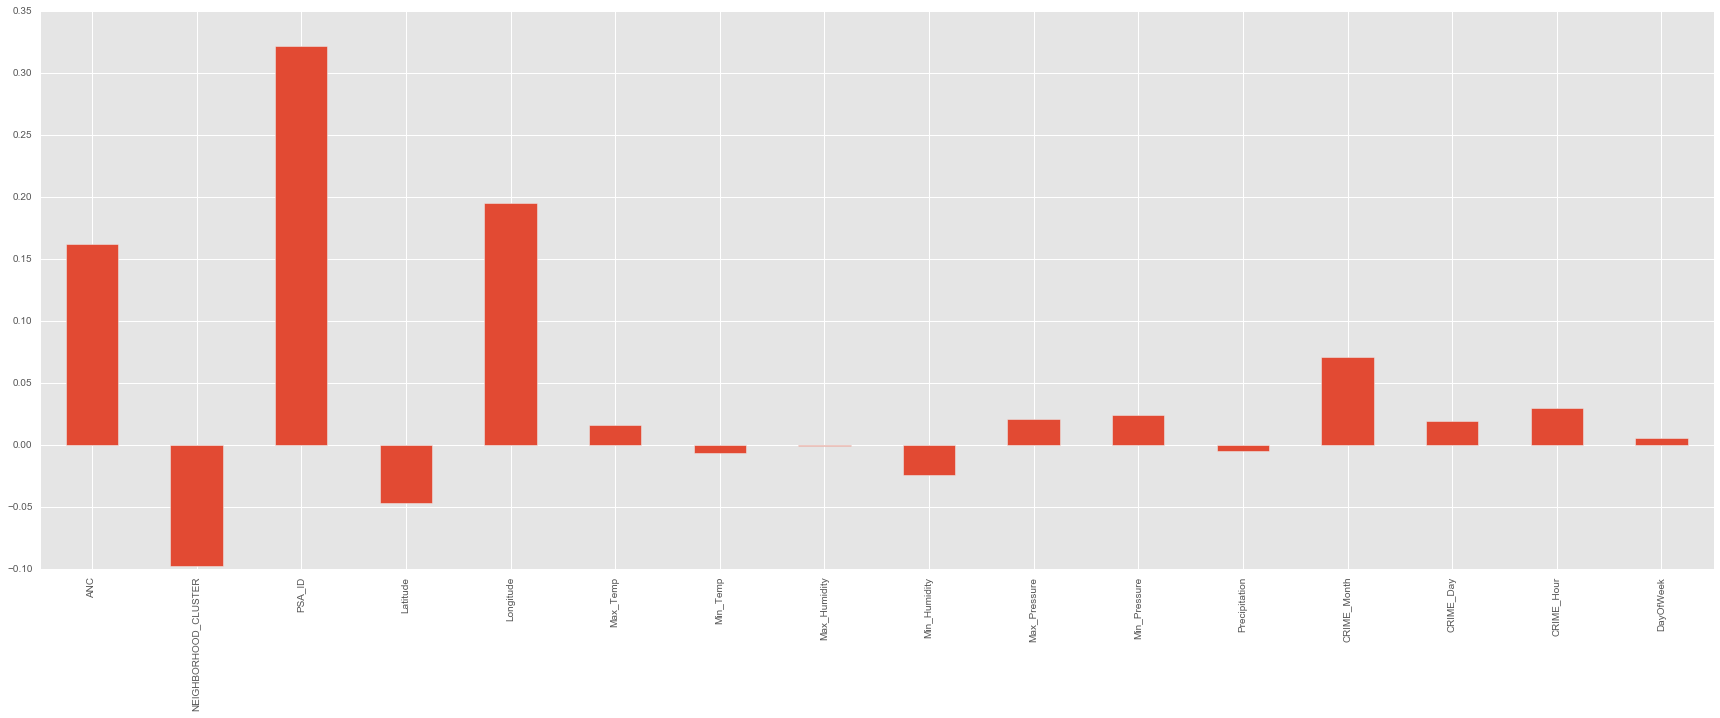

Cross-validation results: [ 0.83068493  0.83068493  0.83068493  0.83091258  0.83091258  0.83091258
  0.83086623  0.83086623  0.40378289  0.30482456].

If the model simply asserted 'violent' all the time, the accuracy should be 0.169174271698.
If the model simply asserted 'property' all the time, the accuracy should be 0.830825728302.
This model's accuracy is 0.822280076733.
Average 10-fold CV accuracy: 0.735513244317.
AUC: 0.658614723298

Confusion Matrix:
[[6001    0]
 [1297    0]]


In [69]:
# Test Set 1: Default LRM on Original training set with no stratified split
DON_Scores = LRM_Default.fit(ON_XTrain, ON_YTrain).decision_function(ON_XTest)
DON_Predictions = LRM_Default.predict(ON_XTest)
DON_AUC = metrics.roc_auc_score(ON_YTest,DON_Scores)
DON_Acc = metrics.accuracy_score(ON_YTest,DON_Predictions)
DON_Conf = metrics.confusion_matrix(ON_YTest,DON_Predictions)
DON_coefs = pd.DataFrame(zip(ORIGINAL.columns, np.transpose(LRM_Default.coef_)), columns=['Factor','Coefficient'])
print
print("---==< Coefficients in descending order of magnitude >==---")
print(DON_coefs.reindex(DON_coefs.Coefficient.abs().sort_values(ascending=False).index))

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
DON_weights = pd.Series(LRM_Default.coef_[0],index=ORIGINAL.columns)
DON_weights.plot(kind='bar')
plt.show()


DON_CV = cross_val_score(LogisticRegression(), ScaledORIGINAL, ORIGINAL_Y, scoring='accuracy', cv=10)
DON_CVMean = DON_CV.mean()

print("Cross-validation results: {0}.".format(DON_CV))
print()
print("If the model simply asserted 'violent' all the time, the accuracy should be {0}.".format(OVonly))
print("If the model simply asserted 'property' all the time, the accuracy should be {0}.".format(OPonly))
print("This model's accuracy is {0}.".format(DON_Acc))
print("Average 10-fold CV accuracy: {0}.".format(DON_CVMean))
print("AUC: {0}".format(DON_AUC))
print()
print("Confusion Matrix:")
print(DON_Conf)

##### 4.1.7.2 Test 2: Default LRM on Original data with stratified split

---==< Coefficients in descending order of magnitude >==---
                  Factor          Coefficient
2                 PSA_ID     [0.305022033284]
4              Longitude      [0.20980834719]
0                    ANC     [0.135454582973]
1   NEIGHBORHOOD_CLUSTER    [-0.067373297651]
12           CRIME_Month    [0.0617700486585]
3               Latitude   [-0.0580481842143]
14            CRIME_Hour    [0.0471425084727]
5               Max_Temp    [0.0313186298813]
8           Min_Humidity   [-0.0300563146313]
9           Max_Pressure      [0.02992890676]
15             DayOfWeek    [0.0157769087262]
6               Min_Temp   [-0.0154356010433]
10          Min_Pressure     [0.010565858862]
7           Max_Humidity  [-0.00872762825666]
13             CRIME_Day  [-0.00835652396318]
11         Precipitation  [-0.00152024145824]


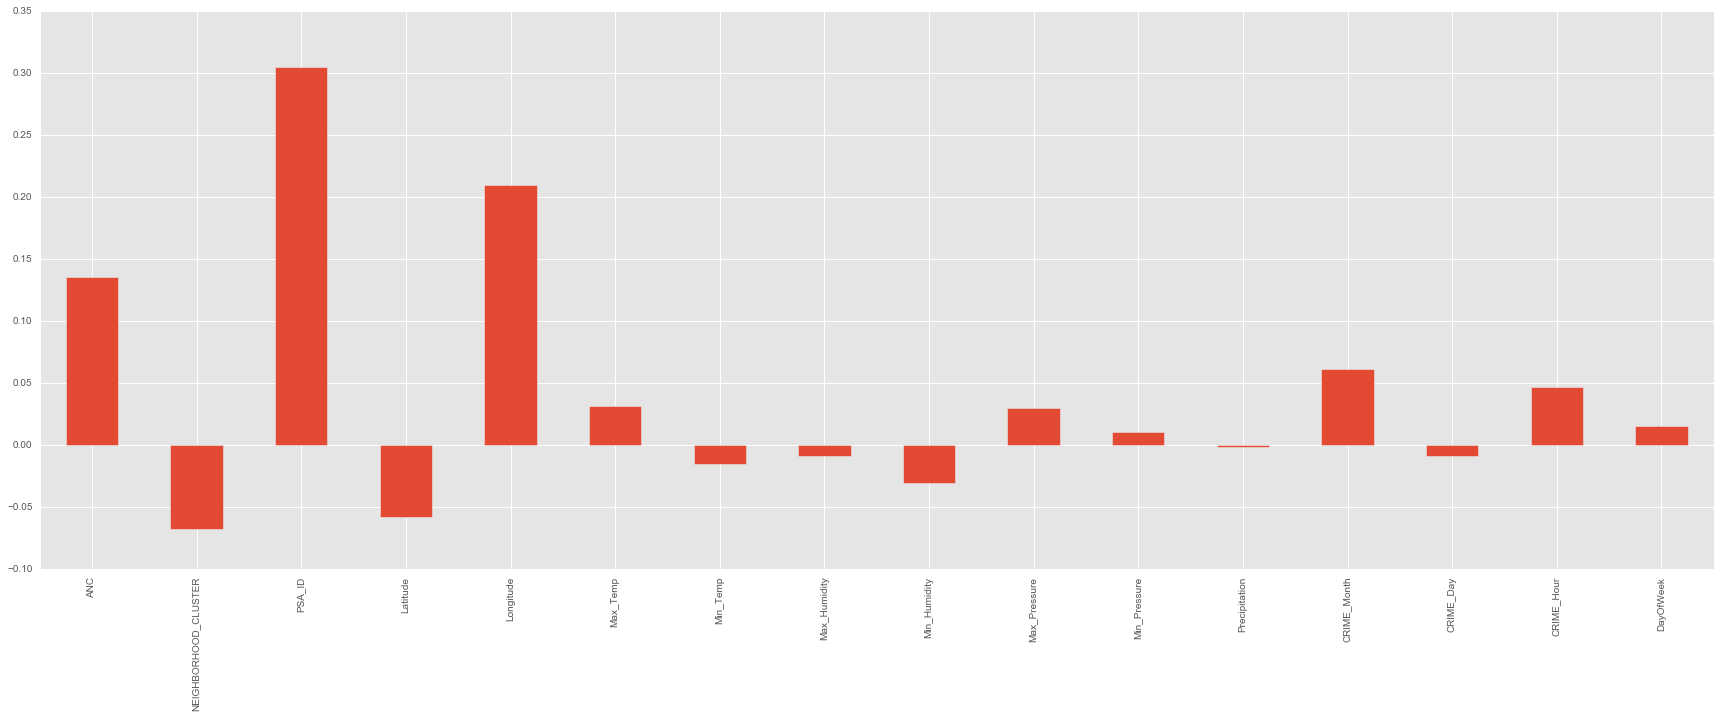

Cross-validation results: [ 0.83068493  0.83068493  0.83068493  0.83091258  0.83091258  0.83091258
  0.83086623  0.83086623  0.40378289  0.30482456].

If the model simply asserted 'violent' all the time, the accuracy should be 0.169174271698.
If the model simply asserted 'property' all the time, the accuracy should be 0.830825728302.
This model's accuracy is 0.830775554947.
Average 10-fold CV accuracy: 0.735513244317.
AUC: 0.652626370478

Confusion Matrix:
[[6063    0]
 [1235    0]]


In [70]:
# Test Set 2: Default LRM on Original training set with stratified split [DOY]
DOY_Scores = LRM_Default.fit(OY_XTrain, OY_YTrain).decision_function(OY_XTest)
DOY_Predictions = LRM_Default.predict(OY_XTest)
DOY_AUC = metrics.roc_auc_score(OY_YTest,DOY_Scores)
DOY_Acc = metrics.accuracy_score(OY_YTest,DOY_Predictions)
DOY_Conf = metrics.confusion_matrix(OY_YTest,DOY_Predictions)
DOY_coefs = pd.DataFrame(zip(ORIGINAL.columns, np.transpose(LRM_Default.coef_)), columns=['Factor','Coefficient'])
print
print("---==< Coefficients in descending order of magnitude >==---")
print(DOY_coefs.reindex(DOY_coefs.Coefficient.abs().sort_values(ascending=False).index))

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
DOY_weights = pd.Series(LRM_Default.coef_[0],index=ORIGINAL.columns)
DOY_weights.plot(kind='bar')
plt.show()

DOY_CV = cross_val_score(LogisticRegression(), ScaledORIGINAL, ORIGINAL_Y, scoring='accuracy', cv=10)
DOY_CVMean = DOY_CV.mean()

print("Cross-validation results: {0}.".format(DOY_CV))
print()
print("If the model simply asserted 'violent' all the time, the accuracy should be {0}.".format(OVonly))
print("If the model simply asserted 'property' all the time, the accuracy should be {0}.".format(OPonly))
print("This model's accuracy is {0}.".format(DOY_Acc))
print("Average 10-fold CV accuracy: {0}.".format(DOY_CVMean))
print("AUC: {0}".format(DOY_AUC))
print()
print("Confusion Matrix:")
print(DOY_Conf)

##### 4.1.7.3 Test 3:Balanced LRM on Original data with NO stratified split

---==< Coefficients in descending order of magnitude >==---
                  Factor           Coefficient
2                 PSA_ID      [0.322360938696]
4              Longitude      [0.234294712824]
0                    ANC      [0.155787622413]
1   NEIGHBORHOOD_CLUSTER     [-0.111848819731]
12           CRIME_Month     [0.0709525601815]
3               Latitude    [-0.0391893485417]
10          Min_Pressure      [0.030527695529]
8           Min_Humidity    [-0.0233242078361]
13             CRIME_Day     [0.0229894955546]
9           Max_Pressure     [0.0180591805897]
5               Max_Temp     [0.0126609315539]
14            CRIME_Hour    [0.00793758720342]
15             DayOfWeek    [0.00466743189819]
11         Precipitation   [-0.00341457416597]
7           Max_Humidity   [-0.00132512418645]
6               Min_Temp  [-0.000876218517276]


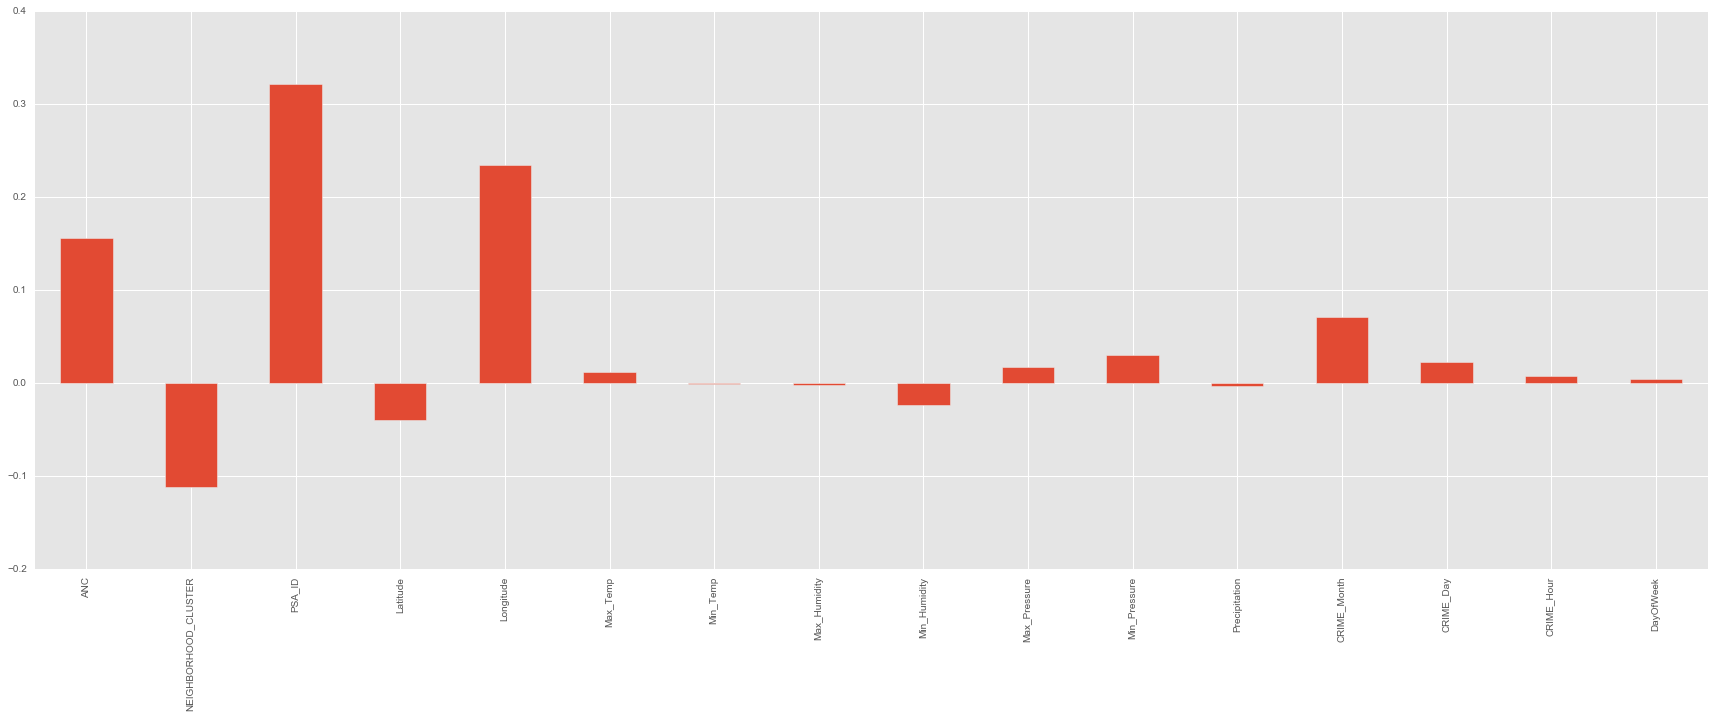

Cross-validation results: [ 0.83041096  0.83013699  0.71178082  0.92628117  0.21649767  0.05124692
  0.58744518  0.18969298  0.16255482  0.16940789].

If the model simply asserted 'violent' all the time, the accuracy should be 0.169174271698.
If the model simply asserted 'property' all the time, the accuracy should be 0.830825728302.
This model's accuracy is 0.64414908194.
Average 10-fold CV accuracy: 0.46754554048.
AUC: 0.658643245915

Confusion Matrix:
[[3968 2033]
 [ 564  733]]


In [71]:
# Test Set 3: Balanced LRM on Original training set with no stratified split [BON]
BON_Scores = LRM_Balanced.fit(ON_XTrain, ON_YTrain).decision_function(ON_XTest)
BON_Predictions = LRM_Balanced.predict(ON_XTest)
BON_AUC = metrics.roc_auc_score(ON_YTest,BON_Scores)
BON_Acc = metrics.accuracy_score(ON_YTest,BON_Predictions)
BON_Conf = metrics.confusion_matrix(ON_YTest,BON_Predictions)
BON_coefs = pd.DataFrame(zip(ORIGINAL.columns, np.transpose(LRM_Balanced.coef_)), columns=['Factor','Coefficient'])
print
print("---==< Coefficients in descending order of magnitude >==---")
print(BON_coefs.reindex(BON_coefs.Coefficient.abs().sort_values(ascending=False).index))

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
BON_weights = pd.Series(LRM_Balanced.coef_[0],index=ORIGINAL.columns)
BON_weights.plot(kind='bar')
plt.show()

BON_CV = cross_val_score(LogisticRegression(class_weight='balanced'), ScaledORIGINAL, ORIGINAL_Y, scoring='accuracy', cv=10)
BON_CVMean = BON_CV.mean()

print("Cross-validation results: {0}.".format(BON_CV))
print()
print("If the model simply asserted 'violent' all the time, the accuracy should be {0}.".format(OVonly))
print("If the model simply asserted 'property' all the time, the accuracy should be {0}.".format(OPonly))
print("This model's accuracy is {0}.".format(BON_Acc))
print("Average 10-fold CV accuracy: {0}.".format(BON_CVMean))
print("AUC: {0}".format(BON_AUC))
print()
print("Confusion Matrix:")
print(BON_Conf)

##### 4.1.7.4 Test 4: Balanced LRM on Original data with stratified split

---==< Coefficients in descending order of magnitude >==---
                  Factor          Coefficient
2                 PSA_ID     [0.303177429361]
4              Longitude     [0.250962250836]
0                    ANC     [0.121842883314]
1   NEIGHBORHOOD_CLUSTER   [-0.0769725152152]
12           CRIME_Month    [0.0605490644381]
3               Latitude   [-0.0518569595751]
8           Min_Humidity   [-0.0301978103065]
9           Max_Pressure    [0.0269497960648]
14            CRIME_Hour     [0.025024500802]
5               Max_Temp     [0.024948171584]
10          Min_Pressure    [0.0154876549327]
15             DayOfWeek    [0.0146126968919]
6               Min_Temp  [-0.00891001996226]
7           Max_Humidity  [-0.00713332268801]
13             CRIME_Day  [-0.00364896373332]
11         Precipitation  [4.61156639786e-05]


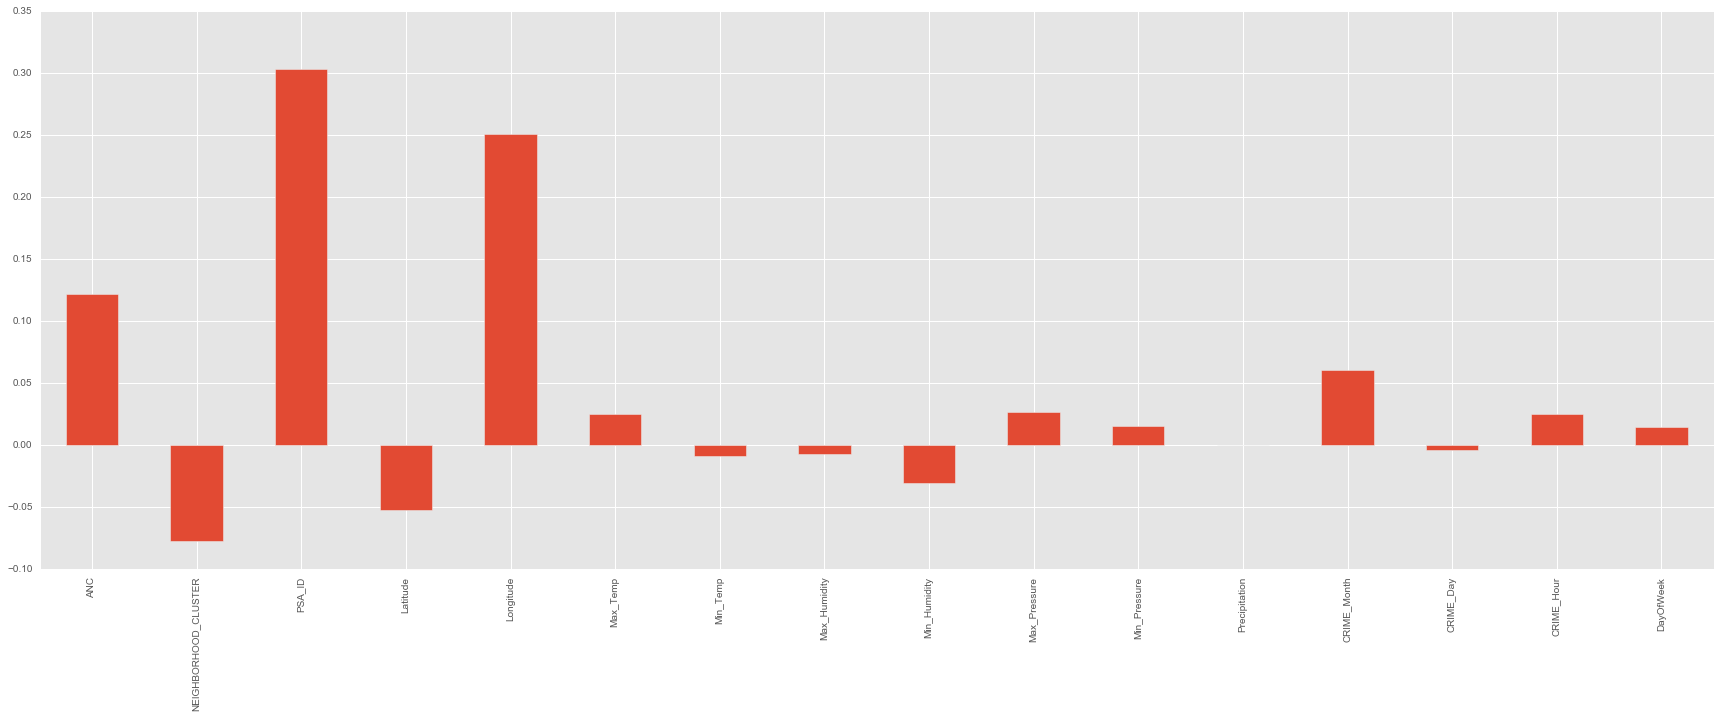

Cross-validation results: [ 0.83041096  0.83013699  0.71178082  0.92628117  0.21649767  0.05124692
  0.58744518  0.18969298  0.16255482  0.16940789].

If the model simply asserted 'violent' all the time, the accuracy should be 0.169174271698.
If the model simply asserted 'property' all the time, the accuracy should be 0.830825728302.
This model's accuracy is 0.648944916415.
Average 10-fold CV accuracy: 0.46754554048.
AUC: 0.65365631183

Confusion Matrix:
[[4051 2012]
 [ 550  685]]


In [72]:
# Test Set 4: Balanced LRM on Original training set with stratified split [BOY]
BOY_Scores = LRM_Balanced.fit(OY_XTrain, OY_YTrain).decision_function(OY_XTest)
BOY_Predictions = LRM_Balanced.predict(OY_XTest)
BOY_AUC = metrics.roc_auc_score(OY_YTest,BOY_Scores)
BOY_Acc = metrics.accuracy_score(OY_YTest,BOY_Predictions)
BOY_Conf = metrics.confusion_matrix(OY_YTest,BOY_Predictions)
BOY_coefs = pd.DataFrame(zip(ORIGINAL.columns, np.transpose(LRM_Balanced.coef_)), columns=['Factor','Coefficient'])
print
print("---==< Coefficients in descending order of magnitude >==---")
print(BOY_coefs.reindex(BOY_coefs.Coefficient.abs().sort_values(ascending=False).index))

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
BOY_weights = pd.Series(LRM_Balanced.coef_[0],index=ORIGINAL.columns)
BOY_weights.plot(kind='bar')
plt.show()

BOY_CV = cross_val_score(LogisticRegression(class_weight='balanced'), ScaledORIGINAL, ORIGINAL_Y, scoring='accuracy', cv=10)
BOY_CVMean = BOY_CV.mean()

print("Cross-validation results: {0}.".format(BOY_CV))
print()
print("If the model simply asserted 'violent' all the time, the accuracy should be {0}.".format(OVonly))
print("If the model simply asserted 'property' all the time, the accuracy should be {0}.".format(OPonly))
print("This model's accuracy is {0}.".format(BOY_Acc))
print("Average 10-fold CV accuracy: {0}.".format(BOY_CVMean))
print("AUC: {0}".format(BOY_AUC))
print()
print("Confusion Matrix:")
print(BOY_Conf)

##### 4.1.7.5 Test 5: Default LRM on SMOTE data with NO stratified split

---==< Coefficients in descending order of magnitude >==---
                  Factor          Coefficient
2                 PSA_ID     [0.325587823108]
4              Longitude     [0.253652963565]
0                    ANC     [0.157817360634]
1   NEIGHBORHOOD_CLUSTER     [-0.13096284724]
12           CRIME_Month    [0.0688187458734]
3               Latitude   [-0.0586923298092]
10          Min_Pressure    [0.0328787917854]
5               Max_Temp    [0.0303941009132]
7           Max_Humidity   [-0.0274477357962]
14            CRIME_Hour    [0.0236890123836]
8           Min_Humidity   [-0.0148324561267]
6               Min_Temp   [-0.0112178129302]
15             DayOfWeek   [0.00748136963573]
9           Max_Pressure  [-0.00648878704611]
11         Precipitation  [-0.00612602903821]
13             CRIME_Day   [0.00160508977851]


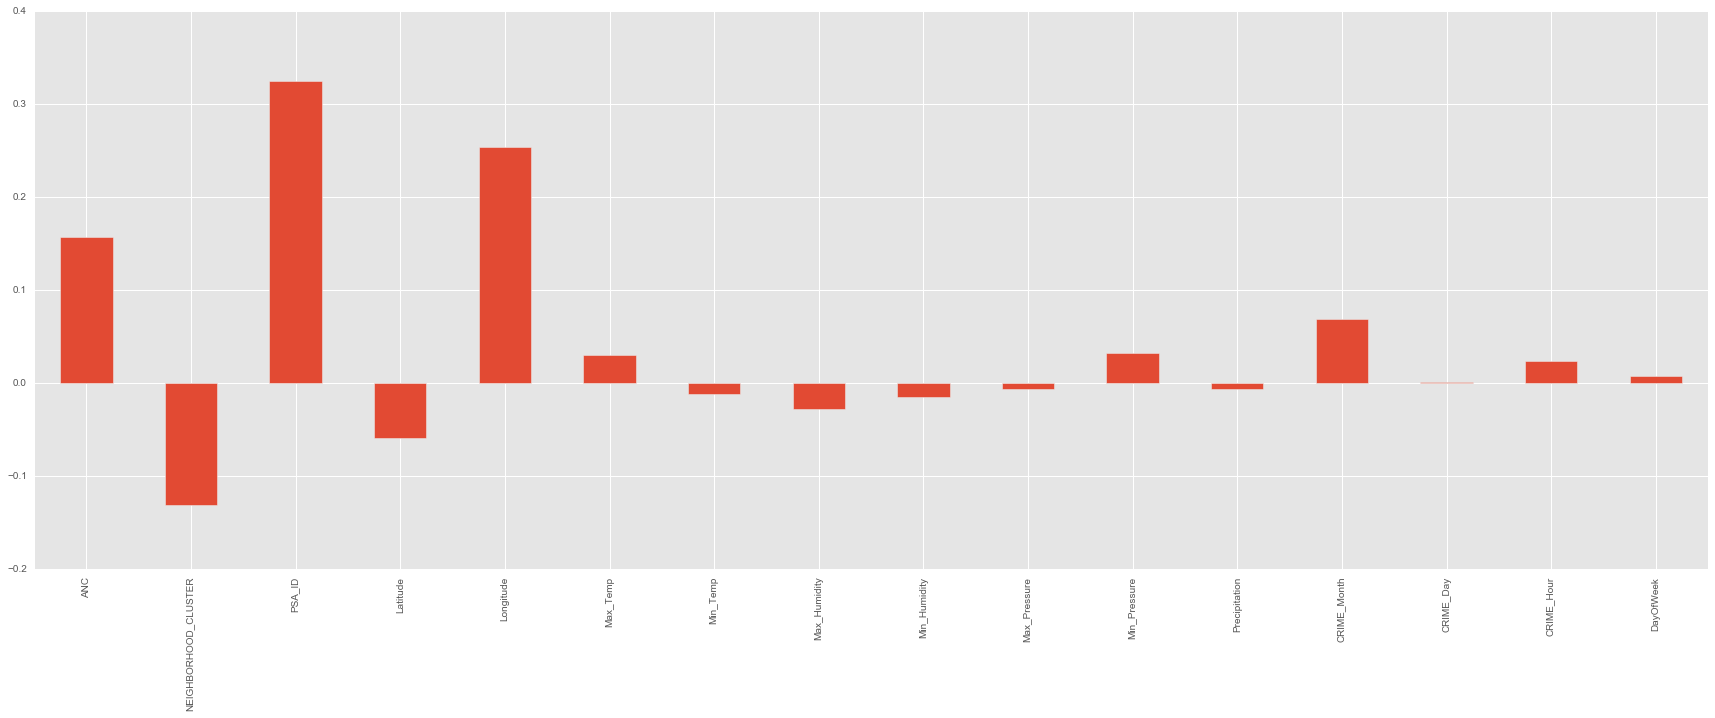

Cross-validation results: [ 0.60058833  0.83118157  0.51969276  0.50988724  0.58653375  0.35469108
  0.50482263  0.52656531  0.50662089  0.47049207].

If the model simply asserted 'violent' all the time, the accuracy should be 0.504486687043.
If the model simply asserted 'property' all the time, the accuracy should be 0.495513312957.
This model's accuracy is 0.613058756231.
Average 10-fold CV accuracy: 0.541107561577.
AUC: 0.662549809898

Confusion Matrix:
[[4015 2010]
 [2725 3487]]


In [73]:
# Test Set 5: Default LRM on SMOTE training set with no stratified split [DSN]
DSN_Scores = LRM_Default.fit(SN_XTrain, SN_YTrain).decision_function(SN_XTest)
DSN_Predictions = LRM_Default.predict(SN_XTest)
DSN_AUC = metrics.roc_auc_score(SN_YTest,DSN_Scores)
DSN_Acc = metrics.accuracy_score(SN_YTest,DSN_Predictions)
DSN_Conf = metrics.confusion_matrix(SN_YTest,DSN_Predictions)
DSN_coefs = pd.DataFrame(zip(SMOTE.columns, np.transpose(LRM_Default.coef_)), columns=['Factor','Coefficient'])
print
print("---==< Coefficients in descending order of magnitude >==---")
print(DSN_coefs.reindex(DSN_coefs.Coefficient.abs().sort_values(ascending=False).index))

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
DSN_weights = pd.Series(LRM_Default.coef_[0],index=SMOTE.columns)
DSN_weights.plot(kind='bar')
plt.show()

DSN_CV = cross_val_score(LogisticRegression(), ScaledSMOTE, SMOTE_Y, scoring='accuracy', cv=10)
DSN_CVMean = DSN_CV.mean()

print("Cross-validation results: {0}.".format(DSN_CV))
print()
print("If the model simply asserted 'violent' all the time, the accuracy should be {0}.".format(SVonly))
print("If the model simply asserted 'property' all the time, the accuracy should be {0}.".format(SPonly))
print("This model's accuracy is {0}.".format(DSN_Acc))
print("Average 10-fold CV accuracy: {0}.".format(DSN_CVMean))
print("AUC: {0}".format(DSN_AUC))
print()
print("Confusion Matrix:")
print(DSN_Conf)

##### 4.1.7.6 Test 6: Default LRM on SMOTE data with stratified split

---==< Coefficients in descending order of magnitude >==---
                  Factor          Coefficient
2                 PSA_ID     [0.327972531038]
4              Longitude     [0.255970738178]
0                    ANC     [0.156895990428]
1   NEIGHBORHOOD_CLUSTER     [-0.12940379152]
12           CRIME_Month    [0.0558249272068]
3               Latitude   [-0.0541612905426]
10          Min_Pressure    [0.0539038637076]
14            CRIME_Hour     [0.033853125876]
5               Max_Temp    [0.0262319240552]
8           Min_Humidity   [-0.0231376651478]
7           Max_Humidity   [-0.0151071279532]
11         Precipitation  [-0.00683299674916]
6               Min_Temp  [-0.00670696222896]
15             DayOfWeek   [0.00609899861441]
9           Max_Pressure  [-0.00604781740838]
13             CRIME_Day   [-0.0010651964547]


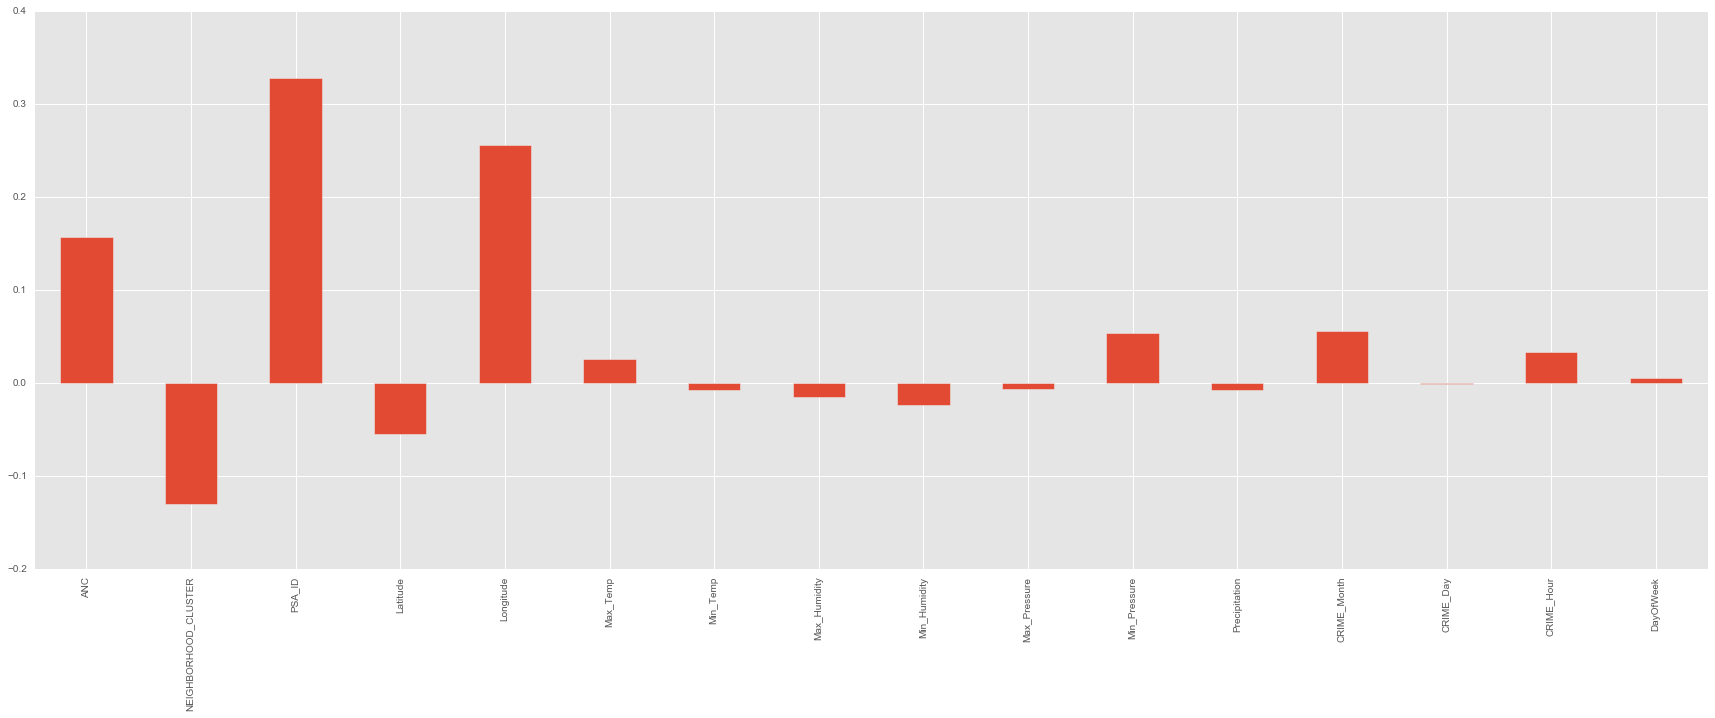

Cross-validation results: [ 0.60058833  0.83118157  0.51969276  0.50988724  0.58653375  0.35469108
  0.50482263  0.52656531  0.50662089  0.47049207].

If the model simply asserted 'violent' all the time, the accuracy should be 0.504486687043.
If the model simply asserted 'property' all the time, the accuracy should be 0.495513312957.
This model's accuracy is 0.611914684972.
Average 10-fold CV accuracy: 0.541107561577.
AUC: 0.658958928084

Confusion Matrix:
[[4032 2032]
 [2717 3456]]


In [74]:
# Test Set 6: Default LRM on SMOTE training set with stratified split [DSY]
DSY_Scores = LRM_Default.fit(SY_XTrain, SY_YTrain).decision_function(SY_XTest)
DSY_Predictions = LRM_Default.predict(SY_XTest)
DSY_AUC = metrics.roc_auc_score(SY_YTest,DSY_Scores)
DSY_Acc = metrics.accuracy_score(SY_YTest,DSY_Predictions)
DSY_Conf = metrics.confusion_matrix(SY_YTest,DSY_Predictions)
DSY_coefs = pd.DataFrame(zip(SMOTE.columns, np.transpose(LRM_Default.coef_)), columns=['Factor','Coefficient'])
print
print("---==< Coefficients in descending order of magnitude >==---")
print(DSY_coefs.reindex(DSY_coefs.Coefficient.abs().sort_values(ascending=False).index))

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
DSY_weights = pd.Series(LRM_Default.coef_[0],index=SMOTE.columns)
DSY_weights.plot(kind='bar')
plt.show()

DSY_CV = cross_val_score(LogisticRegression(), ScaledSMOTE, SMOTE_Y, scoring='accuracy', cv=10)
DSY_CVMean = DSY_CV.mean()

print("Cross-validation results: {0}.".format(DSY_CV))
print()
print("If the model simply asserted 'violent' all the time, the accuracy should be {0}.".format(SVonly))
print("If the model simply asserted 'property' all the time, the accuracy should be {0}.".format(SPonly))
print("This model's accuracy is {0}.".format(DSY_Acc))
print("Average 10-fold CV accuracy: {0}.".format(DSY_CVMean))
print("AUC: {0}".format(DSY_AUC))
print()
print("Confusion Matrix:")
print(DSY_Conf)

##### 4.1.7.7 Test 7: Balanced LRM on SMOTE data with NO stratified split

---==< Coefficients in descending order of magnitude >==---
                  Factor          Coefficient
2                 PSA_ID     [0.303177429361]
4              Longitude     [0.250962250836]
0                    ANC     [0.121842883314]
1   NEIGHBORHOOD_CLUSTER   [-0.0769725152152]
12           CRIME_Month    [0.0605490644381]
3               Latitude   [-0.0518569595751]
8           Min_Humidity   [-0.0301978103065]
9           Max_Pressure    [0.0269497960648]
14            CRIME_Hour     [0.025024500802]
5               Max_Temp     [0.024948171584]
10          Min_Pressure    [0.0154876549327]
15             DayOfWeek    [0.0146126968919]
6               Min_Temp  [-0.00891001996226]
7           Max_Humidity  [-0.00713332268801]
13             CRIME_Day  [-0.00364896373332]
11         Precipitation  [4.61156639786e-05]


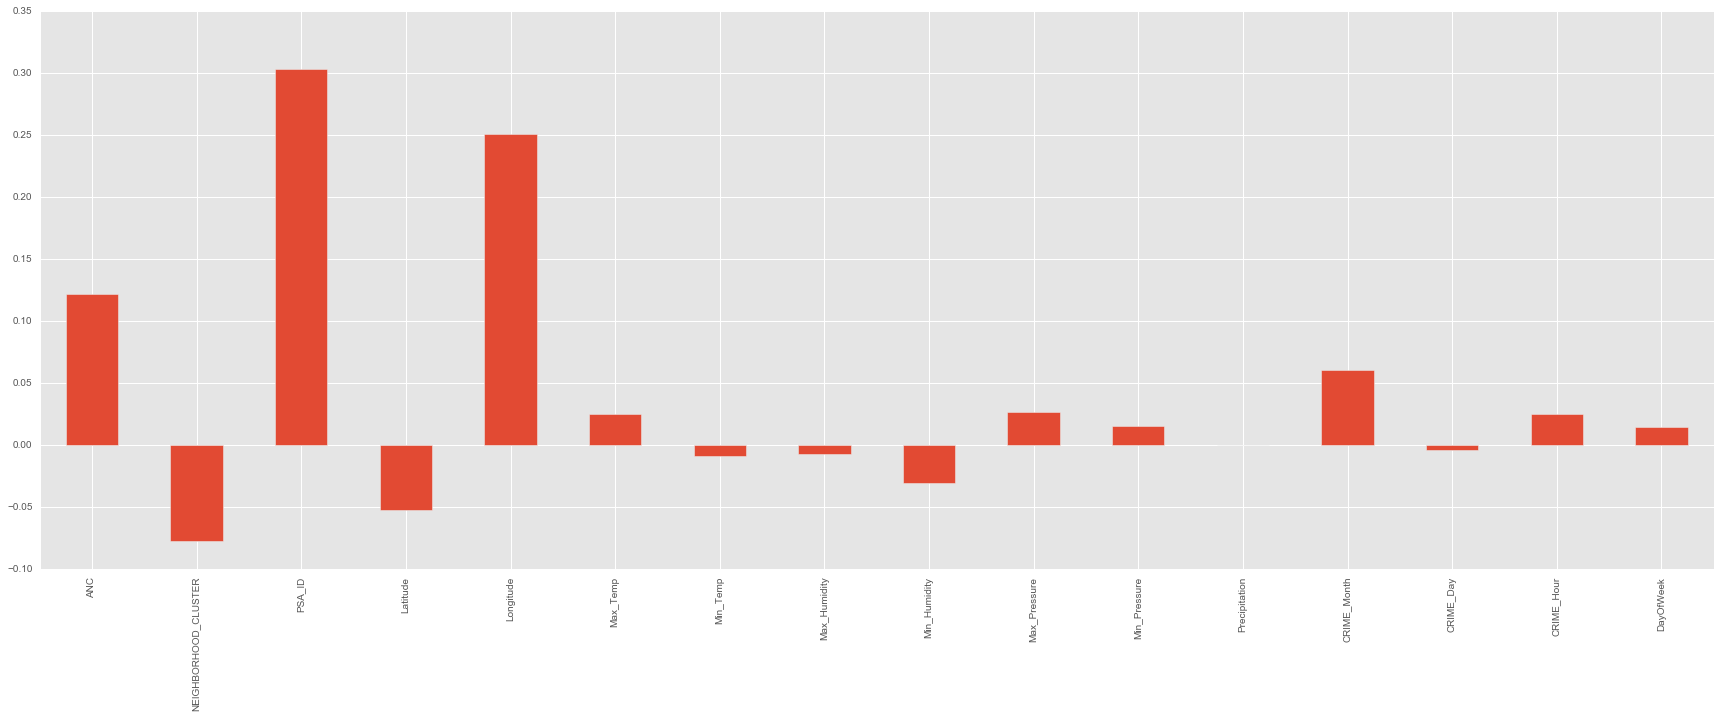

Cross-validation results: [ 0.60009806  0.84343847  0.51756823  0.50857983  0.59797353  0.35403727
  0.50874612  0.53294098  0.50482263  0.47049207].

If the model simply asserted 'violent' all the time, the accuracy should be 0.504486687043.
If the model simply asserted 'property' all the time, the accuracy should be 0.495513312957.
This model's accuracy is 0.611424368718.
Average 10-fold CV accuracy: 0.543869717942.
AUC: 0.662549809898

Confusion Matrix:
[[4184 1841]
 [2914 3298]]


In [75]:
# Test Set 7: Balanced LRM on SMOTE training set with no stratified split [BSN]
BSN_Scores = LRM_Default.fit(SN_XTrain, SN_YTrain).decision_function(SN_XTest)
BSN_Predictions = LRM_Balanced.predict(SN_XTest)
BSN_AUC = metrics.roc_auc_score(SN_YTest,BSN_Scores)
BSN_Acc = metrics.accuracy_score(SN_YTest,BSN_Predictions)
BSN_Conf = metrics.confusion_matrix(SN_YTest,BSN_Predictions)
BSN_coefs = pd.DataFrame(zip(SMOTE.columns, np.transpose(LRM_Balanced.coef_)), columns=['Factor','Coefficient'])
print
print("---==< Coefficients in descending order of magnitude >==---")
print(BSN_coefs.reindex(BSN_coefs.Coefficient.abs().sort_values(ascending=False).index))

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
BSN_weights = pd.Series(LRM_Balanced.coef_[0],index=SMOTE.columns)
BSN_weights.plot(kind='bar')
plt.show()

BSN_CV = cross_val_score(LogisticRegression(class_weight='balanced'), ScaledSMOTE, SMOTE_Y, scoring='accuracy', cv=10)
BSN_CVMean = BSN_CV.mean()

print("Cross-validation results: {0}.".format(BSN_CV))
print()
print("If the model simply asserted 'violent' all the time, the accuracy should be {0}.".format(SVonly))
print("If the model simply asserted 'property' all the time, the accuracy should be {0}.".format(SPonly))
print("This model's accuracy is {0}.".format(BSN_Acc))
print("Average 10-fold CV accuracy: {0}.".format(BSN_CVMean))
print("AUC: {0}".format(BSN_AUC))
print()
print("Confusion Matrix:")
print(BSN_Conf)

##### 4.1.7.8 Test 8: Balanced LRM on SMOTE data with stratified split

---==< Coefficients in descending order of magnitude >==---
                  Factor          Coefficient
2                 PSA_ID     [0.327873354669]
4              Longitude     [0.255001821666]
0                    ANC     [0.156862491406]
1   NEIGHBORHOOD_CLUSTER    [-0.128756544027]
12           CRIME_Month    [0.0558839687986]
3               Latitude   [-0.0542183311825]
10          Min_Pressure    [0.0538016051078]
14            CRIME_Hour    [0.0341664345117]
5               Max_Temp    [0.0262839087399]
8           Min_Humidity   [-0.0231448486551]
7           Max_Humidity   [-0.0151544144257]
11         Precipitation  [-0.00684827981504]
6               Min_Temp  [-0.00680120903449]
15             DayOfWeek   [0.00610636412447]
9           Max_Pressure  [-0.00600774358203]
13             CRIME_Day  [-0.00112548157699]


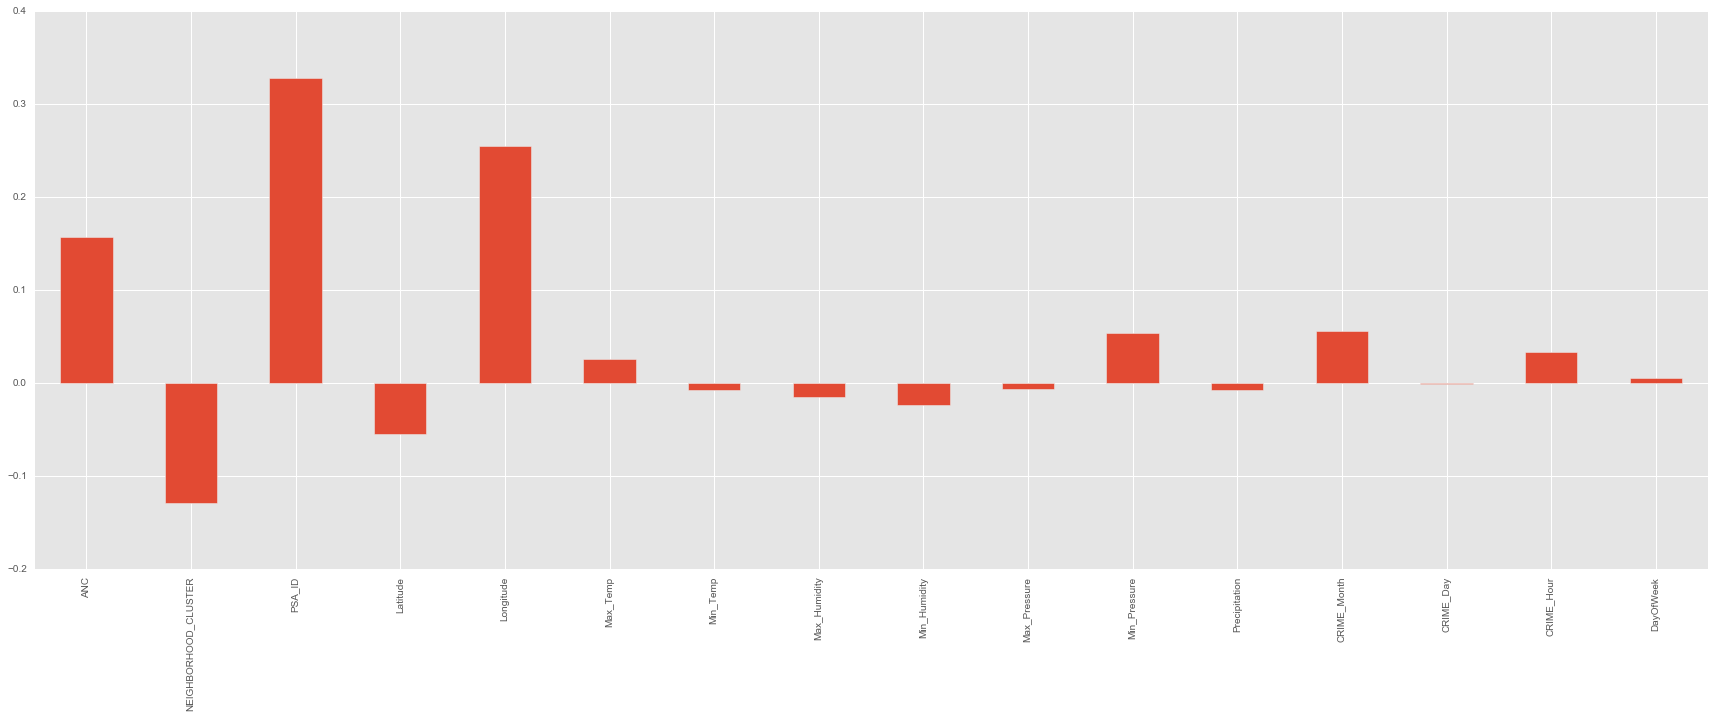

Cross-validation results: [ 0.60009806  0.84343847  0.51756823  0.50857983  0.59797353  0.35403727
  0.50874612  0.53294098  0.50482263  0.47049207].

If the model simply asserted 'violent' all the time, the accuracy should be 0.504486687043.
If the model simply asserted 'property' all the time, the accuracy should be 0.495513312957.
This model's accuracy is 0.612159843099.
Average 10-fold CV accuracy: 0.543869717942.
AUC: 0.658955161361

Confusion Matrix:
[[4055 2009]
 [2737 3436]]


In [76]:
# Test Set 8: Balanced LRM on SMOTE training set with stratified split [BSY]
BSY_Scores = LRM_Balanced.fit(SY_XTrain, SY_YTrain).decision_function(SY_XTest)
BSY_Predictions = LRM_Balanced.predict(SY_XTest)
BSY_AUC = metrics.roc_auc_score(SY_YTest,BSY_Scores)
BSY_Acc = metrics.accuracy_score(SY_YTest,BSY_Predictions)
BSY_Conf = metrics.confusion_matrix(SY_YTest,BSY_Predictions)
BSY_coefs = pd.DataFrame(zip(SMOTE.columns, np.transpose(LRM_Balanced.coef_)), columns=['Factor','Coefficient'])
print
print("---==< Coefficients in descending order of magnitude >==---")
print(BSY_coefs.reindex(BSY_coefs.Coefficient.abs().sort_values(ascending=False).index))

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
BSY_weights = pd.Series(LRM_Balanced.coef_[0],index=SMOTE.columns)
BSY_weights.plot(kind='bar')
plt.show()

BSY_CV = cross_val_score(LogisticRegression(class_weight='balanced'), ScaledSMOTE, SMOTE_Y, scoring='accuracy', cv=10)
BSY_CVMean = BSY_CV.mean()

print("Cross-validation results: {0}.".format(BSY_CV))
print()
print("If the model simply asserted 'violent' all the time, the accuracy should be {0}.".format(SVonly))
print("If the model simply asserted 'property' all the time, the accuracy should be {0}.".format(SPonly))
print("This model's accuracy is {0}.".format(BSY_Acc))
print("Average 10-fold CV accuracy: {0}.".format(BSY_CVMean))
print("AUC: {0}".format(BSY_AUC))
print()
print("Confusion Matrix:")
print(BSY_Conf)

#### 4.1.8 Evaluation of Custom SMOTE

<table style="width:100%;">
 <tr><th>Test</th><th>Dataset</th><th>LRM</th><th>Stratified</th><th>Accuracy</th><th>10 CV</th><th>AUC</th><th>TN</th><th>FN (Rate)</th><th>TP (Rate)</th><th>FP</th></tr>
<tr><td>1</td><td>Orig</td><td>Default</td><td>No</td><td>0.822</td><td>0.736</td><td>0.6586</td><td>6001</td><td>1297 (100%)</td><td>0 (0%)</td><td>0</td></tr>
<tr><td>2</td><td>Orig</td><td>Default</td><td>Yes</td><td>0.831</td><td>0.736</td><td>0.6526</td><td>6063</td><td>1235 (100%)</td><td>0 (0%)</td><td>0</td></tr>
<tr><td>3</td><td>Orig</td><td>Balanced</td><td>No</td><td>0.644</td><td>0.468</td><td>0.6586</td><td>3968</td><td>564 (43.5%)</td><td>733 (56.5%)</td><td>2033</td></tr>
<tr><td>4</td><td>Orig</td><td>Balanced</td><td>Yes</td><td>0.649</td><td>0.468</td><td>0.6537</td><td>4051</td><td>550 (44.5%)</td><td>685 (55.5%)</td><td>2012</td></tr>
<tr><td>5</td><td>SMOTE</td><td>Default</td><td>No</td><td>0.613</td><td>0.541</td><td>0.6625</td><td>4015</td><td>2725 (43.9%)</td><td>3487 (56.1%)</td><td>2010</td></tr>
<tr><td>6</td><td>SMOTE</td><td>Default</td><td>Yes</td><td>0.612</td><td>0.541</td><td>0.6590</td><td>4032</td><td>2717 (44.0%)</td><td>3456 (56.0%)</td><td>2032</td></tr>
<tr><td>7</td><td>SMOTE</td><td>Balanced</td><td>No</td><td>0.611</td><td>0.544</td><td>0.6625</td><td>4184</td><td>2914 (46.9%)</td><td>3298 (53.1%)</td><td>1841</td></tr>
<tr><td>8</td><td>SMOTE</td><td>Balanced</td><td>Yes</td><td>0.612</td><td>0.544</td><td>0.6590</td><td>4055</td><td>2737 (44.3%)</td><td>3436 (55.7%)</td><td>2009</td></tr>
</table>

##### 4.1.8.1 Effects on TPR and FNR
The "positive" class is the indication of a violent crime, with the "negative" class being a property crime.  Because of the seriousness of the classification, it is important that any model/classifier MAXIMIZE the True Positive rate (correctly classifying/predicting a violent crime) and MINIMIZE the False Negative rate (incorrectly classifying/predicting a property crime when it should be a violent crime).

Since we did a full-factorial test set, we can isolate and plot the main effects of the factors on these responses.
![Factor Main Effects](images/SMOTE_Main_effects.png "Factor Main Effects")
<p style='text-align: center;'>
Main Effects by Factor
</p>
The Main Effects plot shows that our custom SMOTE algorithm produced a dataset that did, in fact, improve the True Positive rate and reduce the False Negative rate compared to the original dataset.  It also shows that there is a similar impact by choosing the Balanced Logistic Regression model versus the Default LRM.  Finally, the plot indicates that selecting stratified training/test datasets had very little impact on the rates of interest.

The similarity between the dataset and LRM configuration warrants further investigation into the impact of interactions between those factors.  The following plot shows the interaction effects.
![Factor Interaction Effects](images/SMOTE_Primary_Interactions.png "Factor Interaction Effects")
<p style='text-align: center;'>
Primary Interaction Effects
</p>
The plot of Primary Interactions shows that choosing the Balanced Logistic Regression model with the Original dataset accounted for the drastic effect.  The interaction of LRM configuration with the SMOTE dataset shows (interestingly) that using the Balanced LRM with the SMOTE data has a detrimental effect - it decreases (slightly) the True Positive rate, and increases (slightly) the False Negative rate.

##### 4.1.8.2 Effects on AUC
It is interesting to note that the custom SMOTE dataset produced the highest AUC values: 
- Test 5 and 7 @ 0.6625
- Test 6 @ 0.658959
- Test 8 @ 0.658955
![Factor Main Effects on AUC](images/SMOTE_AUCeffects.png "Factor Main Effects on AUC")
<p style='text-align: center;'>
Main Effects by Factor on AUC
</p>
The main effects plot shows that configuring the Logistic Regression model to use class-balanced weights has only a slight positive effect on AUC.  The SMOTE dataset had a pronounced positive effect on the AUC, and the stratified selection for test/training sets had a pronounced negative effect.  Considering we saw a pronounced effect on TPR/FNR due to the original dataset, we looked to see if the same type of behavior was contributing to the impact on the AUC.
![Factor Interactions on AUC](images/SMOTE_AUCinteract.png "Factor Interaction Effects on AUC")
<p style='text-align: center;'>
Interaction Effects by Factor on AUC
</p>
The interaction effects plot shows that selecting a stratified training/test split adversely affects the AUC, regardless of whether it was on the orignal dataset or the SMOTE dataset.

##### 4.1.8.1 Examination of Coefficients
<table style="width:100%;">
 <tr><th>Test</th><th>PSA</th><th>Longitude</th><th>ANC</th><th>Neighborhood</th><th>Month</th><th>Latitude</th><th>Hour</th><th>Min. Pres.</th><th>Min. Humid.</th><th>Max. Pres.</th><th>Day</th><th>Max. Temp.</th><th>Min. Temp</th><th>Weekday</th><th>Precip.</th><th>Max. Humid.</th></tr> <tr><td>1</td><td>0.321</td><td>0.196</td><td>0.162</td><td>-0.097</td><td>0.071</td><td>-0.046</td><td>0.030</td><td>0.024</td><td>-0.024</td><td>0.022</td><td>0.019</td><td>0.016</td><td>-0.006</td><td>0.006</td><td>-0.005</td><td>0.000</td></tr>
<tr><td>2</td><td>0.305</td><td>0.210</td><td>0.135</td><td>-0.067</td><td>0.062</td><td>-0.058</td><td>0.047</td><td>0.011</td><td>-0.030</td><td>0.030</td><td>-0.008</td><td>0.031</td><td>-0.015</td><td>0.016</td><td>-0.002</td><td>-0.009</td></tr>
<tr><td>3</td><td>0.322</td><td>0.234</td><td>0.156</td><td>-0.112</td><td>0.071</td><td>-0.039</td><td>0.008</td><td>0.031</td><td>-0.023</td><td>0.018</td><td>0.023</td><td>0.013</td><td>-0.001</td><td>0.005</td><td>-0.003</td><td>-0.001</td></tr>
<tr><td>4</td><td>0.303</td><td>0.251</td><td>0.122</td><td>-0.077</td><td>0.061</td><td>-0.052</td><td>0.025</td><td>0.015</td><td>-0.03</td><td>0.027</td><td>-0.004</td><td>0.025</td><td>-0.009</td><td>0.015</td><td>0.000</td><td>-0.007</td></tr>
<tr><td>5</td><td>0.326</td><td>0.254</td><td>0.158</td><td>-0.131</td><td>0.069</td><td>-0.059</td><td>0.024</td><td>0.033</td><td>-0.015</td><td>-0.006</td><td>0.002</td><td>0.03</td><td>-0.011</td><td>0.007</td><td>-0.006</td><td>-0.027</td></tr>
<tr><td>6</td><td>0.328</td><td>0.256</td><td>0.157</td><td>-0.129</td><td>0.056</td><td>-0.054</td><td>0.034</td><td>0.054</td><td>-0.023</td><td>-0.006</td><td>-0.001</td><td>0.026</td><td>-0.007</td><td>0.006</td><td>-0.007</td><td>-0.015</td></tr>
<tr><td>7</td><td>0.303</td><td>0.251</td><td>0.122</td><td>-0.077</td><td>0.061</td><td>-0.052</td><td>0.025</td><td>0.015</td><td>-0.03</td><td>0.027</td><td>-0.004</td><td>0.025</td><td>-0.009</td><td>0.015</td><td>0.000</td><td>-0.007</td></tr>
<tr><td>8</td><td>0.328</td><td>0.255</td><td>0.157</td><td>-0.129</td><td>0.056</td><td>-0.054</td><td>0.034</td><td>0.054</td><td>-0.023</td><td>-0.006</td><td>-0.001</td><td>0.026</td><td>-0.007</td><td>0.006</td><td>-0.007</td><td>-0.015</td></tr>
</table>

All of the models listed the first few variables in the same order and roughly the same magnitude - and agree with our exploratory analyses in lab 1 and the mini-lab.  The variables further to the right switch places from model to model.  Two variables (Max Pressure and Day of the month) appear with both positive and negative signs.  This would indicate that these two variables should be removed from further consideration.

This also shows that the synthetic events generated with our custom SMOTE algorithm (rows 5-8) did not adversely impact the primary factors of interest.

#### 4.1.9 Conclusions
Synthetic Minority Oversampling Techniques provide another tool for us to use to compensate for imbalances in our data. And while some of the tools (available to us in scikit-learn and other libraries) provide configuration parameters, being able to create a custom algorithm using knowledge and understanding of the data set to correct the imbalance and improve the classification task is a far more flexible and powerful capability and skill set that can be applied to a variety of problem sets.

The factor main effects and interaction effects plots showed that our custom SMOTE algorithm provided a dataset that improved the true-positive rate and reduced the false-negative rate, and also increased the area-under-the-curve score.  Using a stratified selection criteria for test/training subsets had no effect on TPR or FNR, and a detrimental effect on AUC - so we will NOT be using that in future exercises.  Selecting the class-balanced weight configuration for the Logistic Regression model had a detrimental effect when combined with SMOTE, but a positive effect when used with the original (unbalanced) dataset.

With better/more complete understanding of the data, we believe we could tweak the algorithm to further improve the accuracy of the classifier.  We control the weighting of the variables, can include conditional processing to handle exceptional events, and add information and controls based on subject-matter-expert inputs.

### 4.2 - Supplimental Data (Attributes Recommended by the Washington, D.C. Police Department)

One of our team members went to Panera Bread in the Washington, DC area for lunch on a Friday afternoon and noticed five policemen enjoying lunch at the same time. Since our team has been working so fervently on the causes of crime in the DC area, the team member decided it would be a good idea to hear the officer's thoughts on the matter. This was a fantastic opportunity for us to receive an opinion from subject-matter experts. After discussion of the project and what we have managed to accomplish thus far, we asked the policemen what they thought would be the most influential factors (as well as possible causes) of crime in the area. Once interviewed, the policemen responded that the likely variables which should be investigated are:

* **Drug Use**
* **Unemployment**
* **Education**
* **Housing prices** 

We then investigated and found the data two of the four variables (Unemployment and Housing) in the ANC datat set that map to [ANC data](http://www.neighborhoodinfodc.org). As [DJ Patil](https://www.whitehouse.gov/blog/author/dj-patil), the Whitehouse Deputy Chief Technology Officer for Data Policy and Chief Data Scientist suggests, we used open data and data science to hopefully solve present and future problems.   

### 4.3 - Pipeline and Grid Search
Pipeline and GridSearchCV were utilized in determining the best algorithm and over a range of parameters. A code snippet is show below. In this snippet a pipeline is setup with three steps.
1. Scale the features
2. Reduce the dimensions
3. Create a classifier

```
pipe = Pipeline(steps=[('scale', StandardScaler()),
                        ('reduce', PCA(svd_solver='randomized')),
                        ('clf', KNeighborsClassifier())])
```

A list of parameter grids then defined that map to the pipeline steps. The pipeline will act as a new estimator gluing together multiple processing steps. For instance, 'clf' instructs the pipeline to use the new classifier. For classifier KNeighborsClassifier, 'clf__n_neighbors' and 'clf__weights' parameters are varied to determine the best parameters that result in the best CV output. The next algorithm tested is RandomForestClassifier followed by GaussianNB. 

```
param_grid = [{'clf': [KNeighborsClassifier(algorithm='auto', n_jobs=-1)],
               'clf__n_neighbors': [100, 150, 200],
               'clf__weights': ['uniform', 'distance']},
               {'clf': [RandomForestClassifier(n_estimators=50, 
                                               n_jobs=-1, class_weight='balanced')],
                'scale': [None],
                'clf__n_estimators': [50, 100, 200]},
               {'clf': [GaussianNB()]}]
```

A `GridSearchCV` object is then created with for a stratified cross validation of 10 for the defined pipeline and parameter grid. Then the grid is fitted with the training data. The grid will iterate over the three algorithms and determine the best algorithm and for the range of parameters. This solution provides a compact, efficient way to run through varies parameters over a series of steps.

```            
grid = GridSearchCV(pipe, param_grid=param_grid, cv=10)
%timeit grid.fit(X_train, y_train)
```